

# QC Merged Data (latest experiments 40 - 45)

Merge the datasets from the different experiments and QC them to get a combined dataset for downstream analysis.

To then be added to already merged data for experiments 1, 3, 6, 9, 10, 12, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39.



In [1]:
library(knitr)
knitr::opts_chunk$set(dev = "CairoPNG")
library(tidyverse)
library(viridis)
library(ggthemes, quietly = TRUE)
library(ggbeeswarm)
library(ggridges)
library(cowplot)
library(scater)
library(scran)
library(SingleCellExperiment)
library(DT)
# library(future)
library(pryr)
if (interactive()) {
    rmote::rmote_on(server_dir="/hps/nobackup/hipsci/scratch/singlecell_endodiff/figures/servr")
rmote::rmote_device(width = 900, height = 600)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggthemes’:

    theme_map

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are mas


# Load data

Load the data from the individual experiments that we will merge.



In [2]:
expts <- c("40", "41", "42", "43", "44", "45")
sce_objects <- paste0("sce_expt", expts)
sce_list <- list()
for(ex in expts) {
    rdata_file <- file.path(paste0("../../data_processed/expt", ex),
                            paste0("sceset_expt", ex,
                                   "_salmon_allmeta_allcells.rds"))
    cat("Experiment ", ex, "\n")
    cat("...........", rdata_file, "\n")
    sce_list[[paste0("sce_expt", ex)]] <- readRDS(rdata_file)
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]])$gene_strand <- rowData(sce_list[[obj]])$strand
    rowData(sce_list[[obj]])$strand <- NULL
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]]) <- rowData(sce_list[[obj]])[, 1:10]
}
colnames_coldata <- list()
for(obj in names(sce_list)) {
    colnames_coldata[[obj]] <- colnames(colData(sce_list[[obj]]))
}
common_coldatanames <- Reduce(intersect, colnames_coldata)
for(obj in names(sce_list)) {
    colData(sce_list[[obj]]) <- colData(sce_list[[obj]])[, common_coldatanames]
}

sce <- do.call("cbind", sce_list)
sce

Experiment  40 
........... ../../data_processed/expt40/sceset_expt40_salmon_allmeta_allcells.rds 
Experiment  41 
........... ../../data_processed/expt41/sceset_expt41_salmon_allmeta_allcells.rds 
Experiment  42 
........... ../../data_processed/expt42/sceset_expt42_salmon_allmeta_allcells.rds 
Experiment  43 
........... ../../data_processed/expt43/sceset_expt43_salmon_allmeta_allcells.rds 
Experiment  44 
........... ../../data_processed/expt44/sceset_expt44_salmon_allmeta_allcells.rds 
Experiment  45 
........... ../../data_processed/expt45/sceset_expt45_salmon_allmeta_allcells.rds 


class: SingleCellExperiment 
dim: 39385 15753 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(15753): 24842_5#10 24842_5#100 ... 25698_8#98 25698_8#99
colData names(121): salmon_version samp_type ...
  is_cell_control_control donor_short_id
reducedDimNames(0):
spikeNames(0):

In [3]:
# names(colData(sce))

In [4]:
install.packages("pryr")
library(pryr)

Warning message in install.packages("pryr"):
“installation of package ‘pryr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
mem_used()

20.2 GB

In [6]:
rm(sce_list)


Experiments included in this dataset:



In [7]:
ncol(sce[,sce$donor != "unknown"])
ncol(sce)

[1] 13715

[1] 15753

In [6]:
unique(sce$experiment)

[1] "expt_40" "expt_41" "expt_42" "expt_43" "expt_44" "expt_45"


Save this object with everything to disk.



In [131]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_40to45.rds")


Given there are such enormous discrepancies in ERCC levels between experiments we will remove the ERCC genes from consideration.



In [7]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]


## Load full dataset



In [132]:
sce <- readRDS("../../data_processed/merged/20180601/sce_merged_preqc_40to45.rds")


Size of `SingleCellExperiment` object in memory:



In [8]:
object_size(sce)

9.94 GB

In [9]:
sce

class: SingleCellExperiment 
dim: 39293 15753 
metadata(0):
assays(2): tpm counts
rownames(39293): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ENSG00000273484_OR6R2P ENSG00000273490_TSEN34
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(15753): 24842_5#10 24842_5#100 ... 25698_8#98 25698_8#99
colData names(121): salmon_version samp_type ...
  is_cell_control_control donor_short_id
reducedDimNames(0):
spikeNames(0):


## Define endoderm differentiation genes

We define a set of known pluripotency and endoderm differentiation genes that we want
to retain and focus on in downstream analyses.



In [135]:
pluri_markers <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                   "ENSG00000164362_TERT", "ENSG00000181449_SOX2",
                   "ENSG00000121570_DPPA4")
pluri_markers_select <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                          "ENSG00000181449_SOX2")
mesendo_markers <- c("ENSG00000164458_T", "ENSG00000163508_EOMES",
                     "ENSG00000185155_MIXL1")
defendo_markers <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                     "ENSG00000141448_GATA6", "ENSG00000125798_FOXA2",
                     "ENSG00000164736_SOX17", "ENSG00000133937_GSC",
                     "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
defendo_markers_select <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                            "ENSG00000164736_SOX17",
                            "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
later_markers <- c("ENSG00000152804_HHEX", "ENSG00000170608_FOXA3")
diff_genes <- c(pluri_markers, mesendo_markers, defendo_markers, later_markers)


## Filter out very lowly-expressed genes

We filter out genes with extremely low gene expression values (<100
counts in total across all cells), but retain endoderm differentation
genes regardless, so that we can later track what is going on with
them.

Replace NA HGNC symbol for ERCCs with ERCC name.

The output below shows the nubmer of genes with/without HGNC symbols,
that are/aren't lowly expressed, and that are/aren't duplicated gene
symbols.



In [136]:
rowData(sce)$hgnc_symbol[is.na(rowData(sce)$hgnc_symbol)] <-
             rowData(sce)$feature_id[is.na(rowData(sce)$hgnc_symbol)]
missing_hgnc <- is.na(rowData(sce)$hgnc_symbol) | rowData(sce)$hgnc_symbol == ""
missing_hgnc[is.na(missing_hgnc)] <- TRUE
table(missing_hgnc)
low_genes <- (rowSums(counts(sce)) < 100)
table(low_genes)

missing_hgnc
FALSE  TRUE 
29501  9884 

low_genes
FALSE  TRUE 
28921 10464 

In [137]:
dup_gene <- duplicated(rowData(sce)$hgnc_symbol)
table(dup_gene)

dup_gene
FALSE  TRUE 
26370 13015 


Filter out genes with no HGNC symbol and retain just one gene for each
HGNC symbol. The table below shows the number of retained genes (TRUE)
and filtered genes (FALSE).



In [138]:
keep_gene <- ((rownames(sce) %in% diff_genes) | !(missing_hgnc | low_genes | dup_gene))
table(keep_gene)
#length(grep("^ERCC", rownames(sce)[keep_gene]))
#all(diff_genes %in% rownames(sce)[keep_gene])
sce <- sce[keep_gene,]
sce

keep_gene
FALSE  TRUE 
18166 21219 

class: SingleCellExperiment 
dim: 21219 15753 
metadata(0):
assays(2): tpm counts
rownames(21219): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00165_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(15753): 24842_5#10 24842_5#100 ... 25698_8#98 25698_8#99
colData names(121): salmon_version samp_type ...
  is_cell_control_control donor_short_id
reducedDimNames(0):
spikeNames(0):


This substantially reduces the size of the `SingleCellExperiment`
object in memory.



In [139]:
object_size(sce)

5.38 GB


Merged dataset across all experiments sequenced so far contains data
for ~20,000 cells. These cells need serious QC before use.

We have many missing days for earlier experiments, but most later
experiments have data from all differentiation days.



In [140]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_40  732    0  728  766
  expt_41  384  767  768  768
  expt_42  384    0  683  763
  expt_43  708  756  768  767
  expt_44  767  767  768  768
  expt_45  752  719  721  749



# Calculate QC metrics

We calculate QC metrics, using ERCC and mitochondrial genes as feature
controls and bulk and control wells as cell controls.



In [142]:
# sce$well_type

In [143]:
table(sce$well_type)
sce$well_type[is.na(sce$well_type)] <- "single cell"
sce$well_type[is.na(sce$well_type) &
              sce$well_id %in% c("A01", "P01", "A24", "B24", "C24", "D24",
                                 "E24", "F24")] <- "bulk"
sce$well_type[sce$well_id %in% c("P21", "P22", "P23", "P24")] <- "control"
sce$well_type[sce$well_type == "empty"] <- "control"


       bulk     control single cell 
        280         151       15322 

In [144]:
ercc_genes <- grepl("^ERCC", rownames(sce))
mt_genes <- grepl("^MT-", rowData(sce)$hgnc_symbol)
sce <- calculateQCMetrics(sce,
    feature_controls = list(ERCC = ercc_genes, MT = mt_genes),
    cell_controls = list(bulk = (sce$well_type == "bulk"),
                         control = (sce$well_type == "control")))

In [145]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_40to45_with_qc_metrics.rds")

In [ ]:
#sce <- readRDS("../../data_processed/merged/sce_merged_preqc_with_qc_metrics.rds")




# QC plots

## Plots of control wells




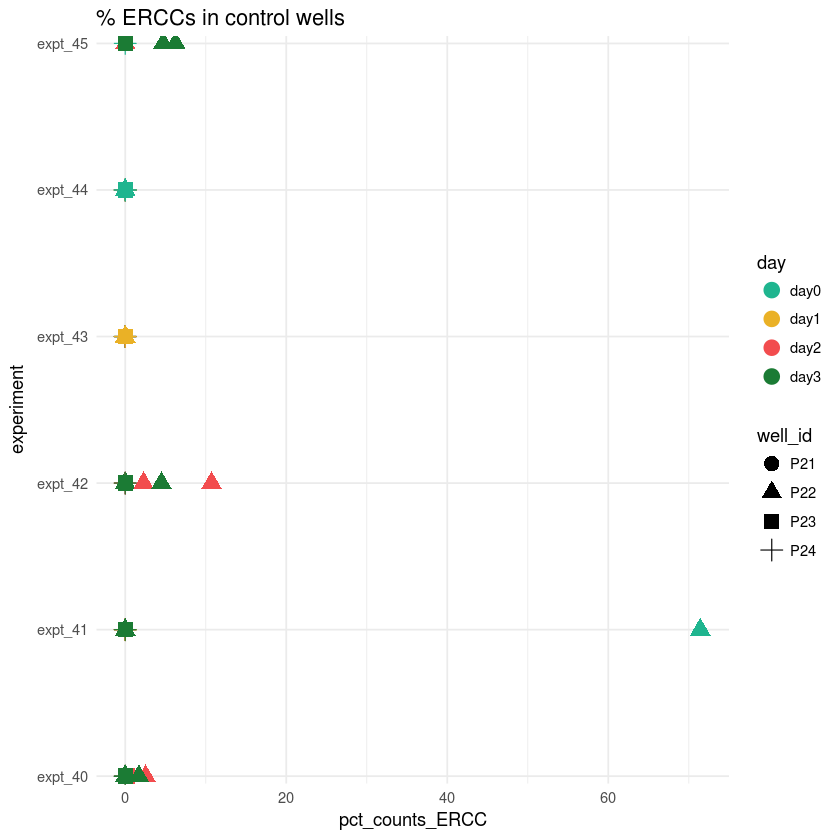

In [146]:
ggplot(as.data.frame(colData(sce)[sce$well_type == "control",]),
       aes(x = pct_counts_ERCC, y = experiment, color = day,
           shape = well_id)) +
    geom_point(size = 4) +
    scale_color_canva(palette = "Tropical tones") +
    ggtitle("% ERCCs in control wells") +
   scale_y_discrete(expand = c(0.01, 0))  + theme_minimal()


P21 and P23 are positive controls; P22 and P24 are negative controls. ERCCs in A1, P21, P22, no ERCCS in P23, P24.



In [147]:
sce$control_type <- NA
sce$control_type[sce$well_id %in% c("P21", "P23")] <- "pos_ctl"
sce$control_type[sce$well_id %in% c("P22", "P24")] <- "neg_ctl"

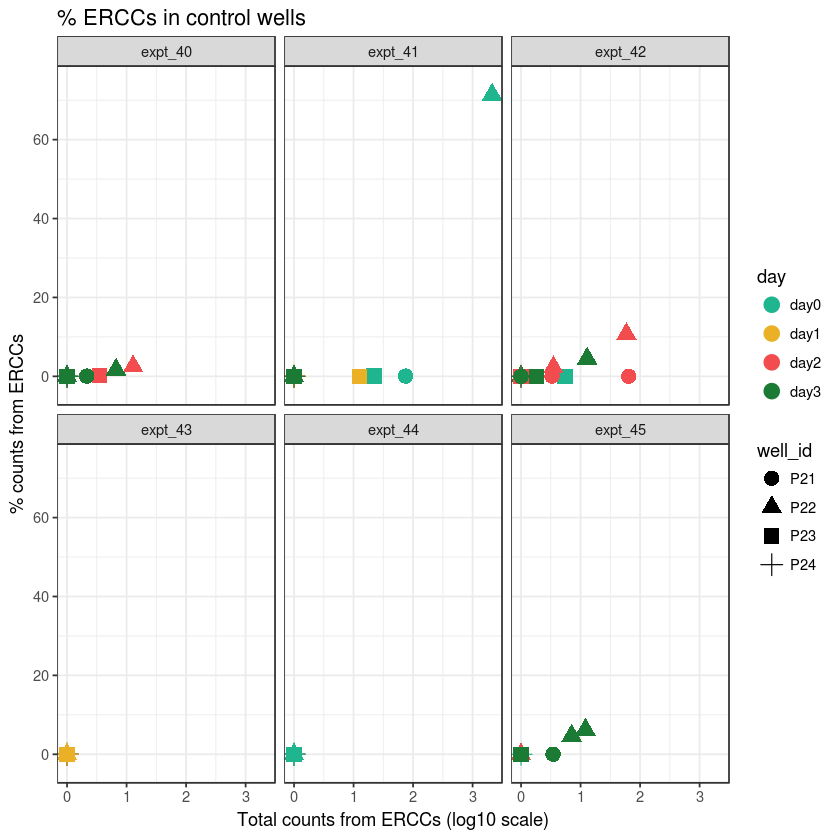

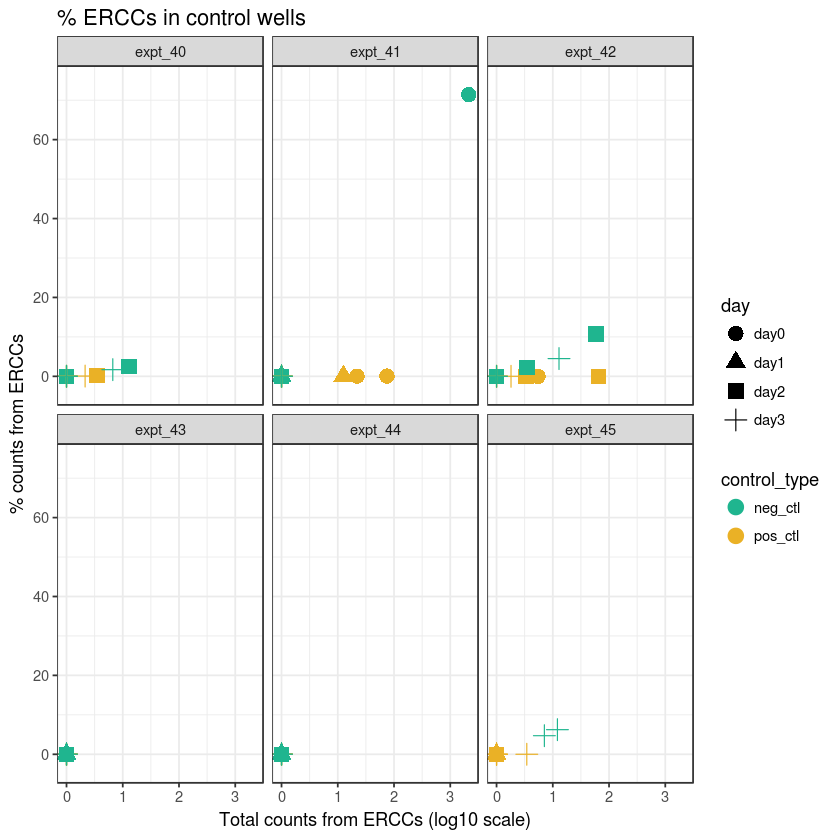

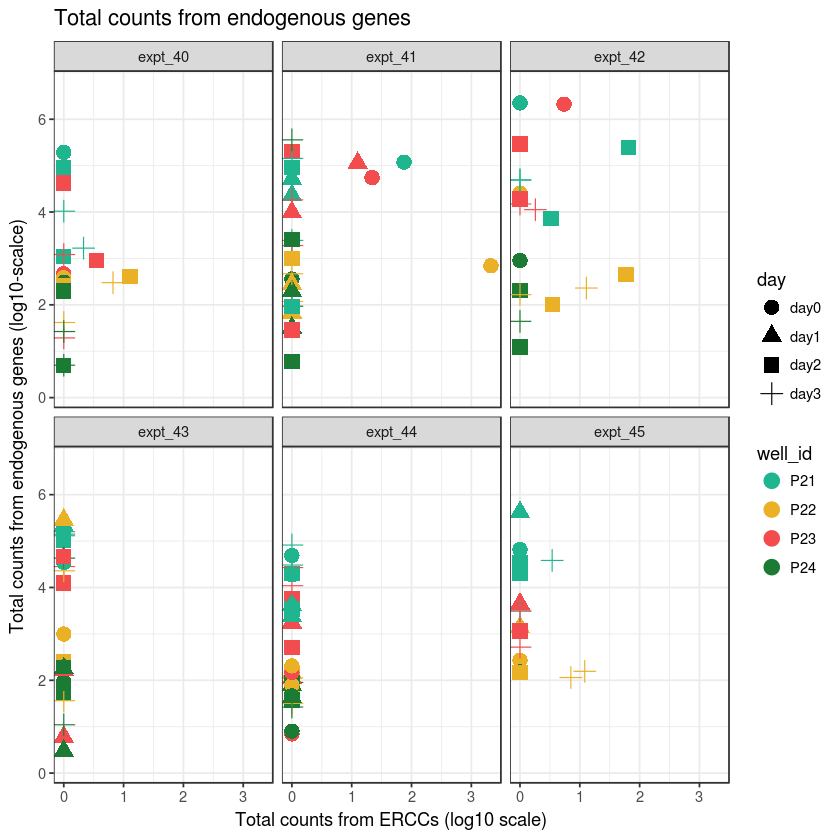

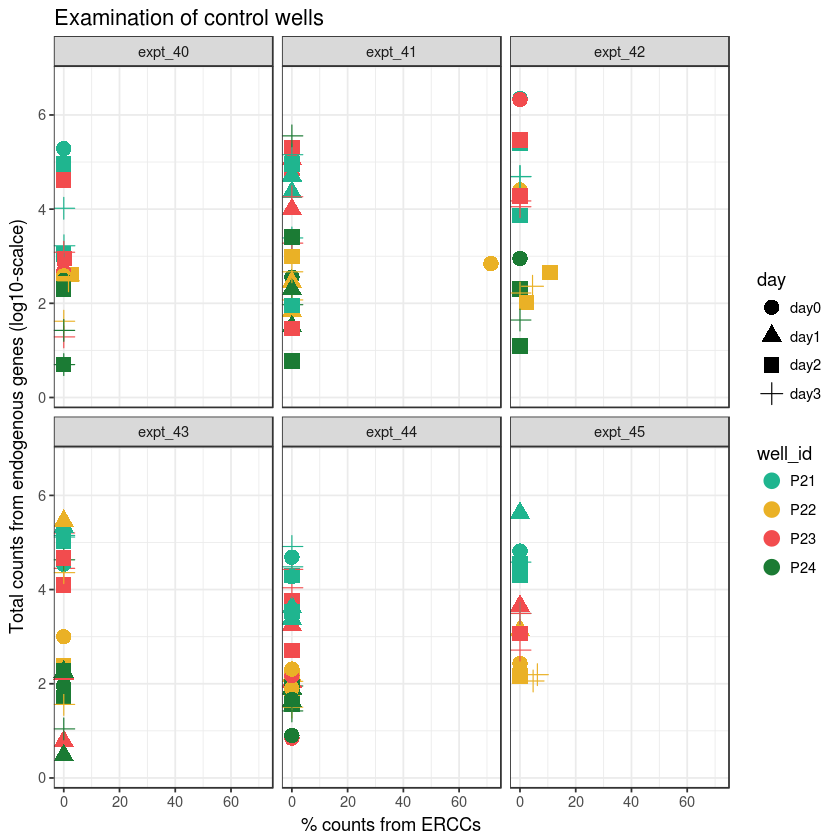

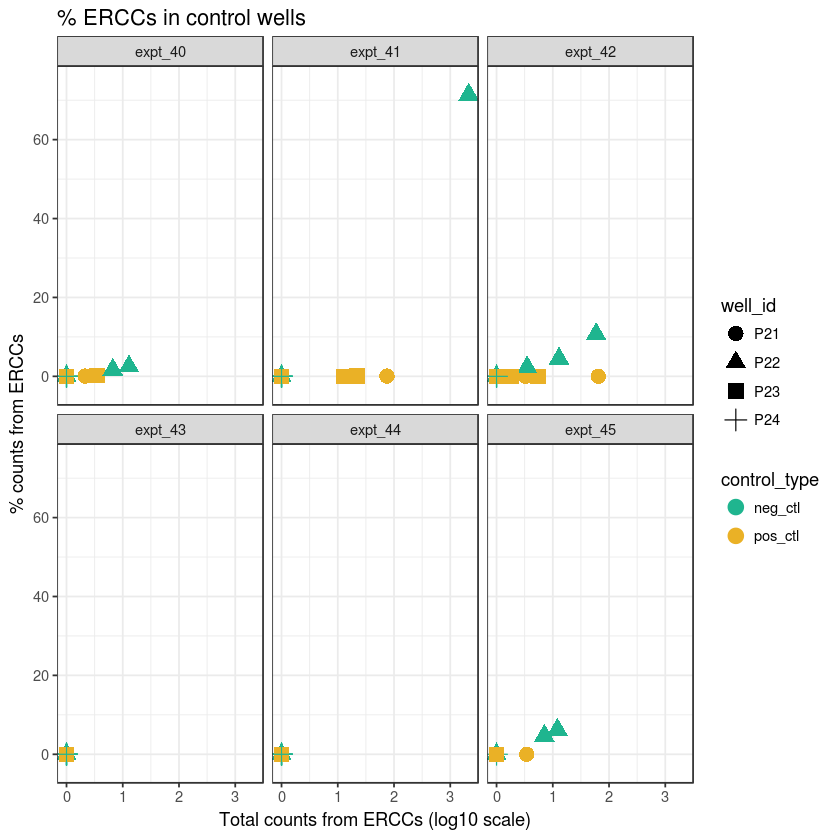

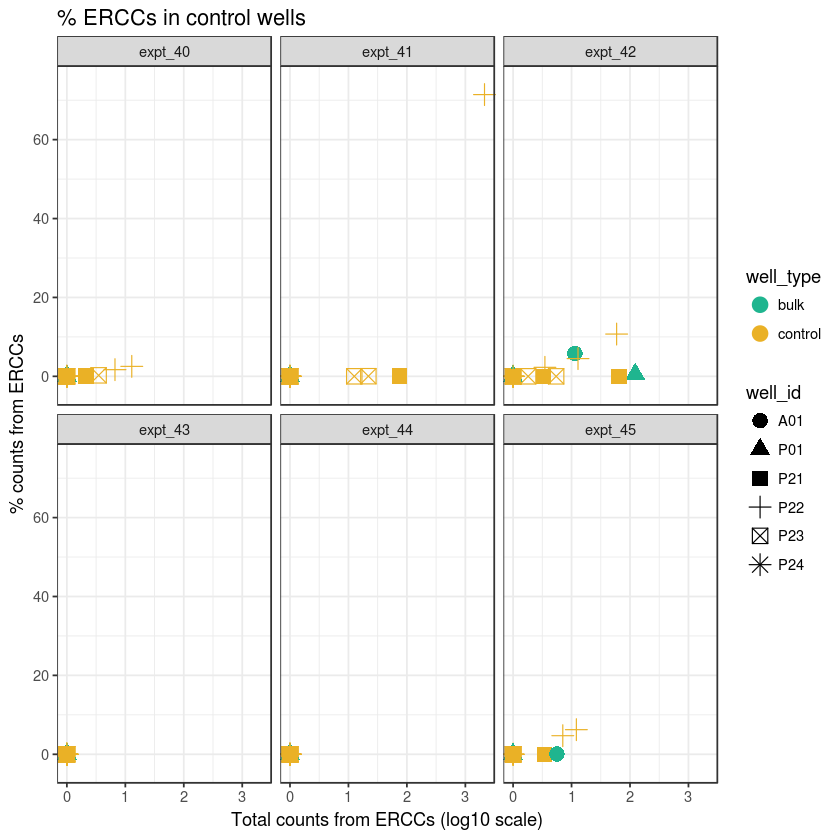

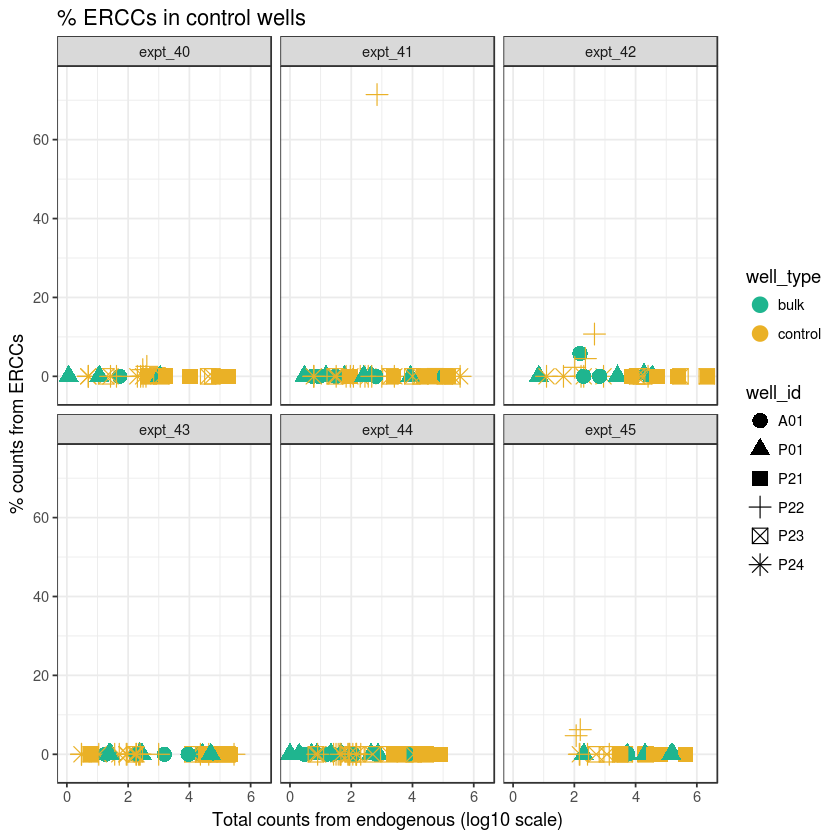

In [148]:
ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC,
           x = log10_total_counts_ERCC, color =  day, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = log10_total_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("Total counts from endogenous genes") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = pct_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("% counts from ERCCs") +
    ggtitle("Examination of control wells") +
    scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_endogenous, color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from endogenous (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()



## Distributions of QC metrics across days



In [149]:
library(RColorBrewer)
col_list = c(brewer.pal(8,"Set1"), brewer.pal(8,"Set2"), brewer.pal(12,"Set3"), brewer.pal(12,"Paired"),
             brewer.pal(9,"Pastel1"), brewer.pal(8,"Pastel2"), brewer.pal(8,"Dark2"), brewer.pal(8,"Accent"))

Picking joint bandwidth of 0.671
Picking joint bandwidth of 0.776
Picking joint bandwidth of 0.932
Picking joint bandwidth of 1.43


Picking joint bandwidth of 0.0896
Picking joint bandwidth of 0.235
Picking joint bandwidth of 0.0671
Picking joint bandwidth of 0.0749


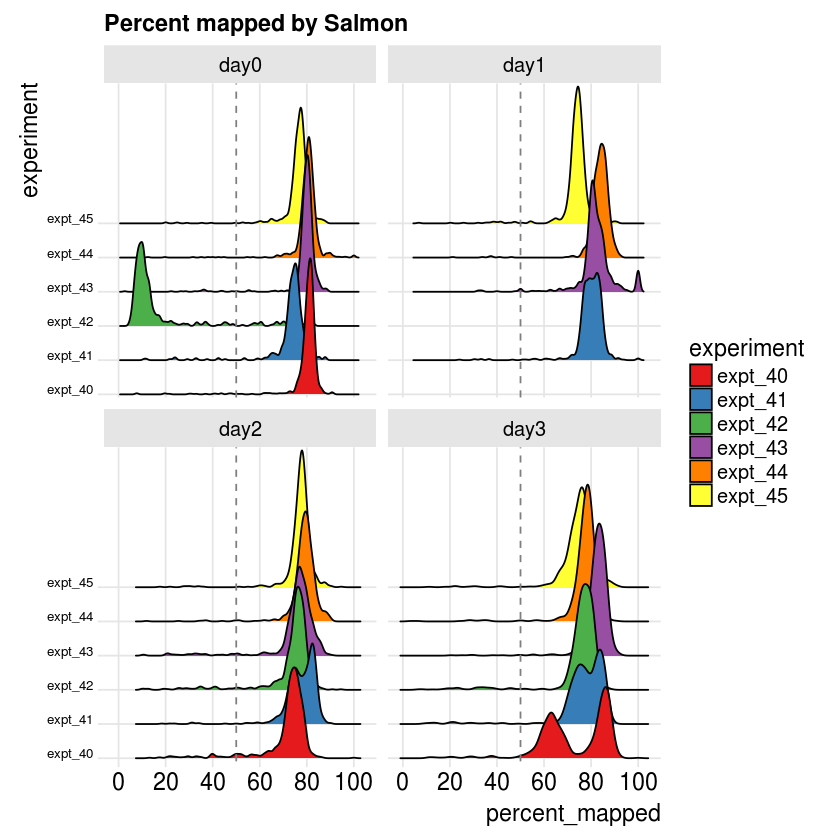

Picking joint bandwidth of 370
Picking joint bandwidth of 648
Picking joint bandwidth of 293
Picking joint bandwidth of 352


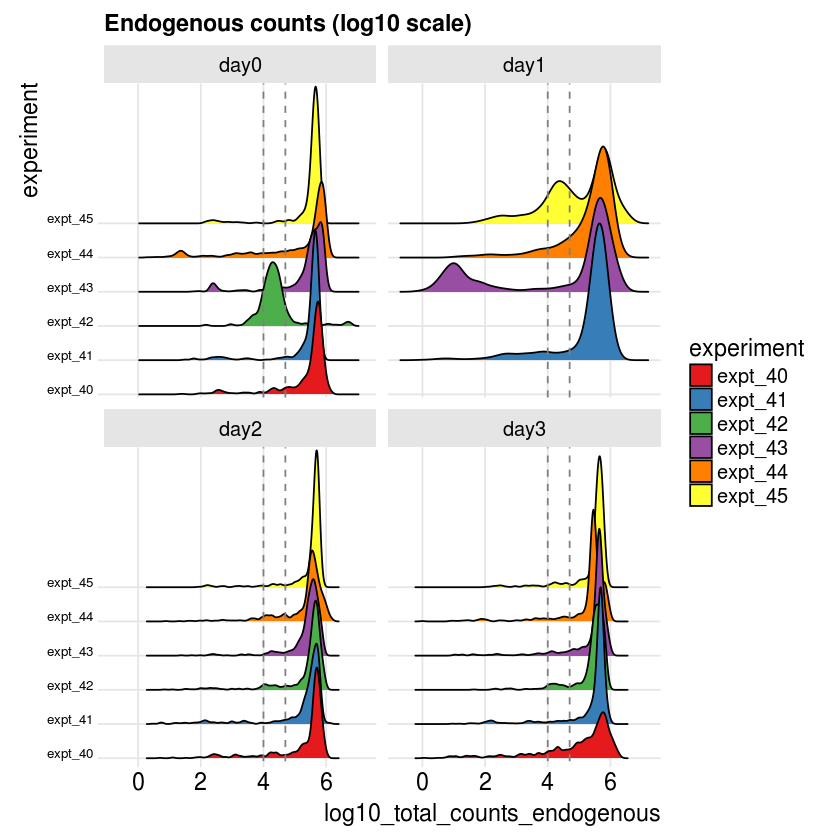

Picking joint bandwidth of 0.164
Picking joint bandwidth of 0.000247
Picking joint bandwidth of 0.00285
Picking joint bandwidth of 0.0156
Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”

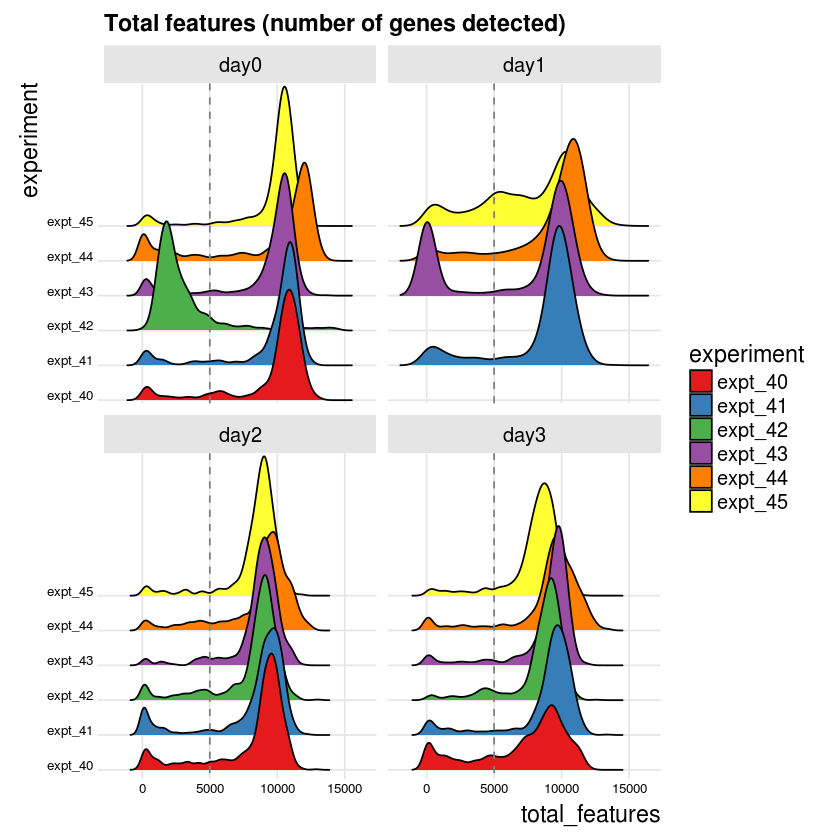

Picking joint bandwidth of 0.123
Picking joint bandwidth of 0.0869
Picking joint bandwidth of 0.167
Picking joint bandwidth of 0.146


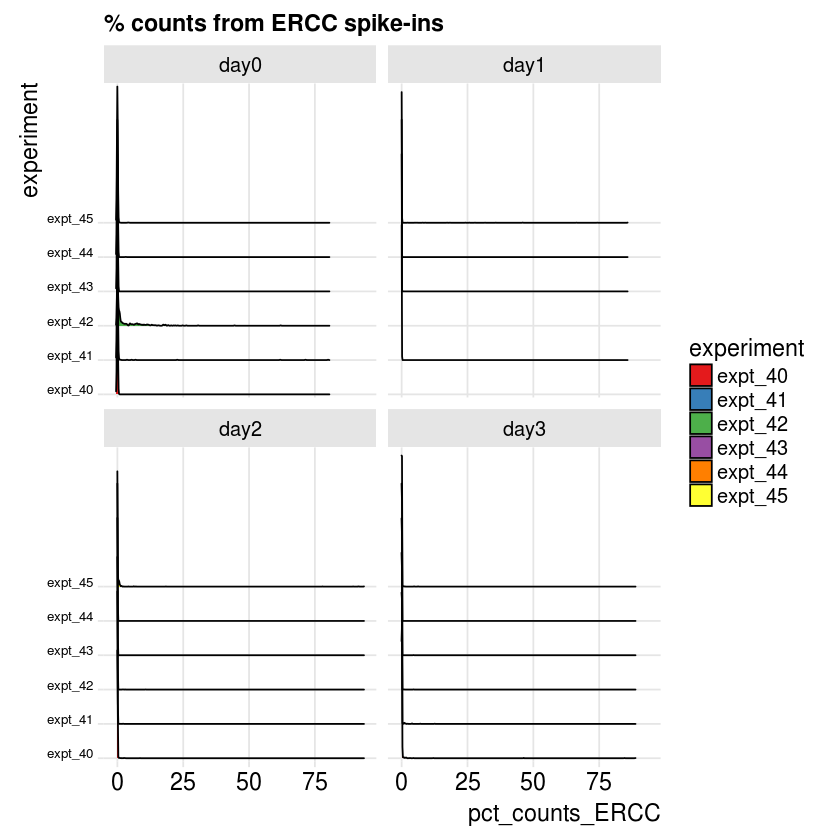

Picking joint bandwidth of 0.513
Picking joint bandwidth of 0.489
Picking joint bandwidth of 0.547
Picking joint bandwidth of 0.527
Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”

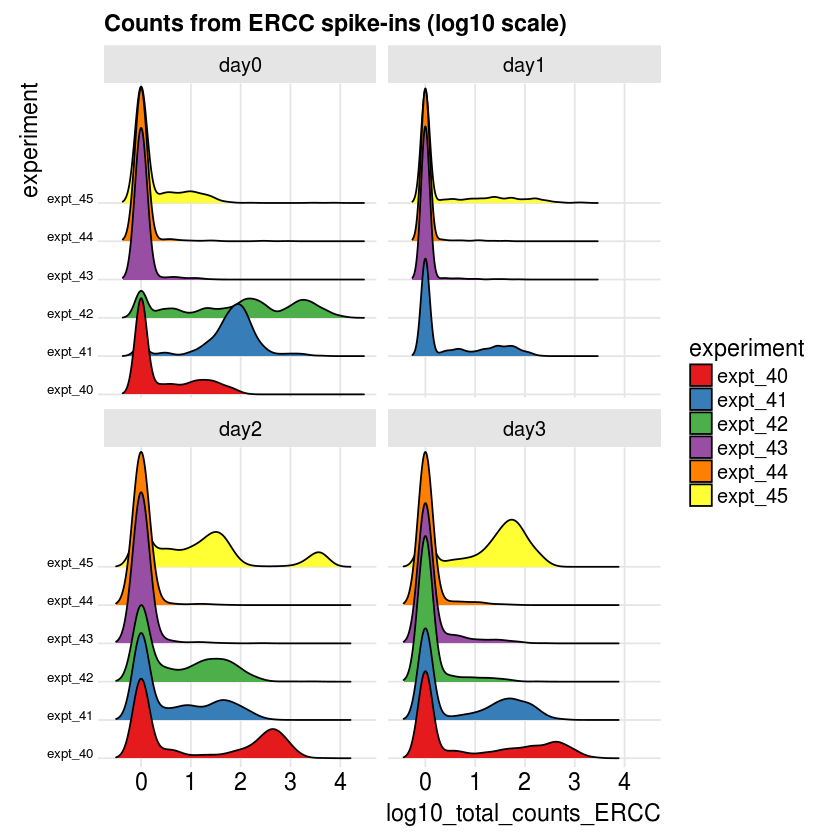

Picking joint bandwidth of 1.37
Picking joint bandwidth of 2.2
Picking joint bandwidth of 0.751
Picking joint bandwidth of 0.799
Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”

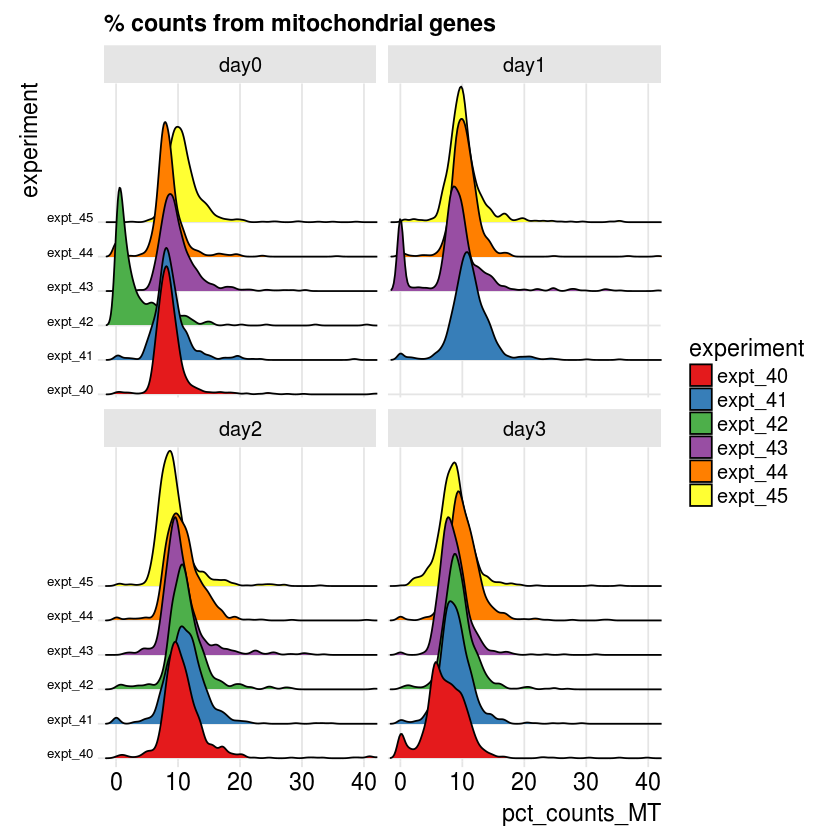

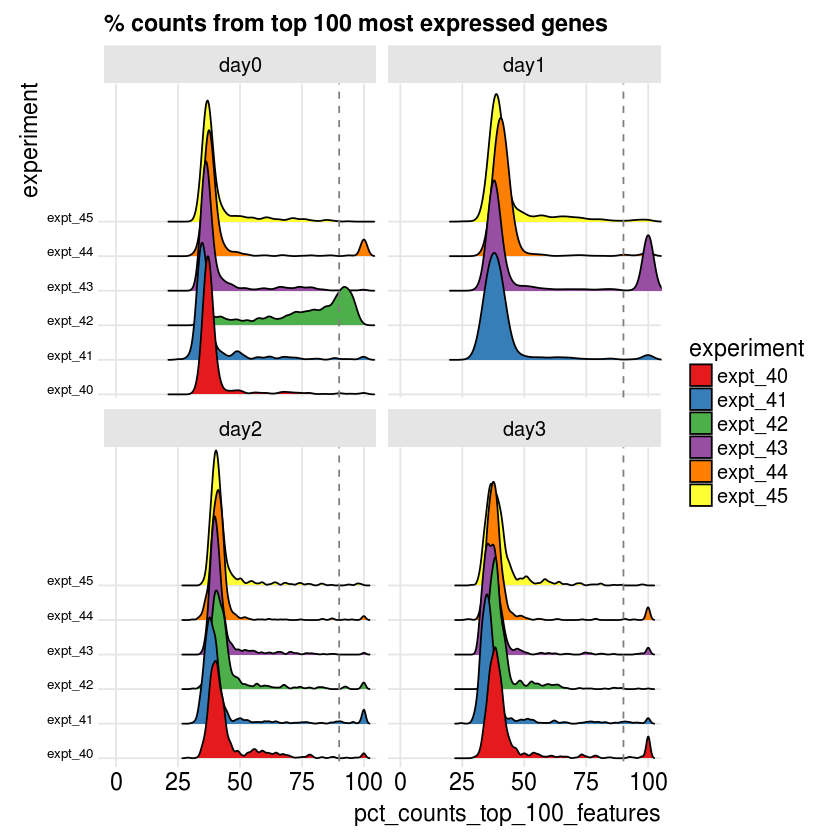

In [150]:
ggplot(as.data.frame(colData(sce)), aes(x = percent_mapped, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 50, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Percent mapped by Salmon") +
    scale_x_continuous(breaks = c(0, 20, 40, 60, 80, 100)) +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_endogenous, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) +
    geom_vline(xintercept = c(4, log10(50000)), linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Endogenous counts (log10 scale)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = total_features, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 5000, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Total features (number of genes detected)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8), axis.text.x = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)),
       aes(x = pct_counts_ERCC, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from ERCC spike-ins") +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_ERCC,
                                        y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list)  +
    ggtitle("Counts from ERCC spike-ins (log10 scale)" ) +
    scale_y_discrete(expand = c(0.01, 0))  + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_MT,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) +
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from mitochondrial genes") +
    coord_cartesian(xlim = c(0, 40)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_top_100_features,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 90, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from top 100 most expressed genes") +
    coord_cartesian(xlim = c(0, 100)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))



## Endogenous counts against total counts



In [24]:
length( unique(sce$experiment))
expt_list <- unique(sce$experiment)

[1] 6

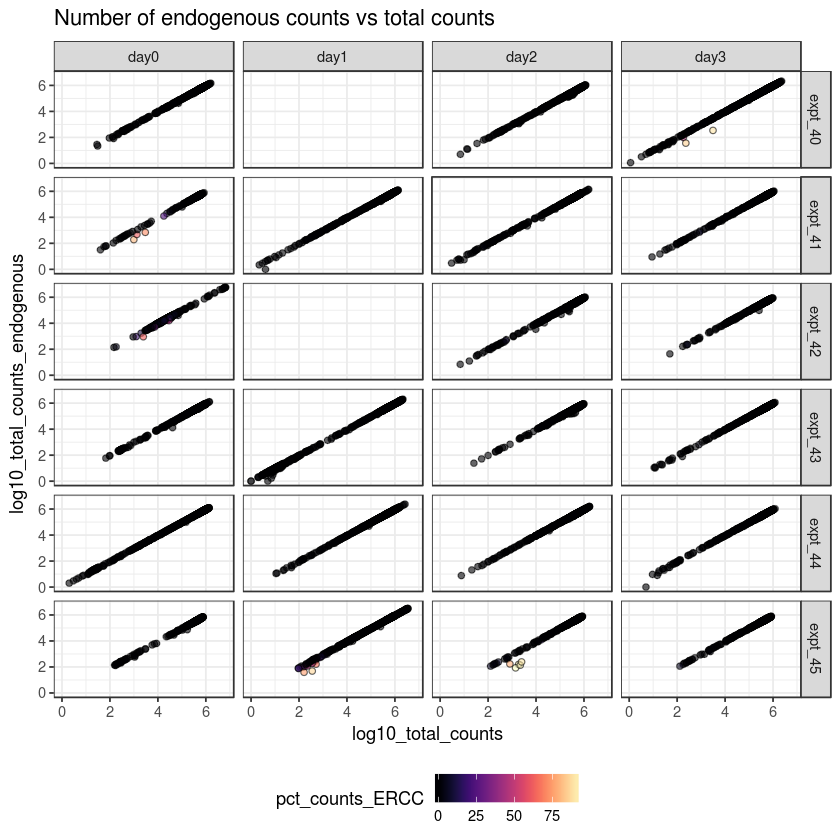

In [151]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts vs total counts") +
     theme_bw() + theme(legend.position = "bottom")


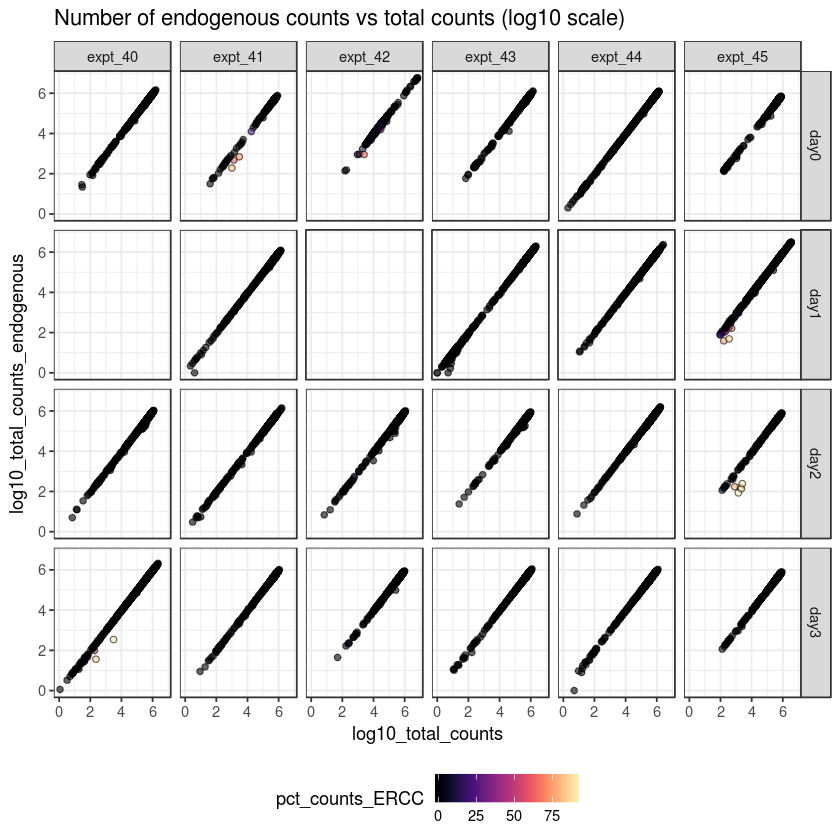

In [152]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(day ~ experiment) + ggtitle("Number of endogenous counts vs total counts (log10 scale)") +
     theme_bw() + theme(legend.position = "bottom")


## Percent of reads mapped vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



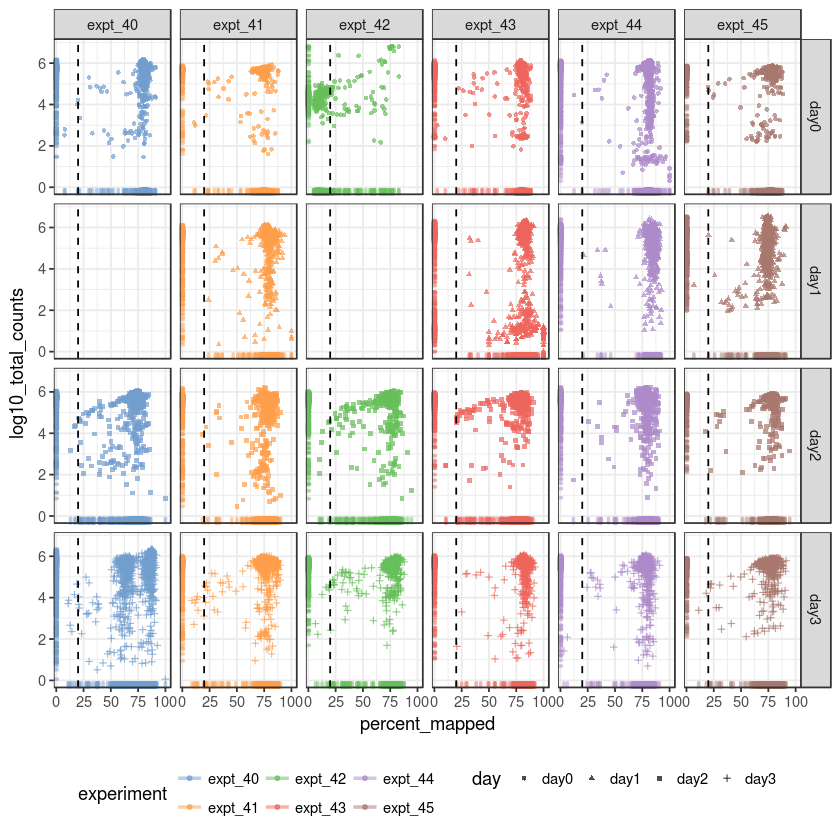

In [27]:
p1 <- plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts,
              colour = experiment, shape = day)) +
theme(legend.position = "bottom") +
geom_vline(xintercept = 20, linetype = 2) +
facet_grid(day ~ experiment)
p1 + theme_bw() + theme(legend.position = "bottom")

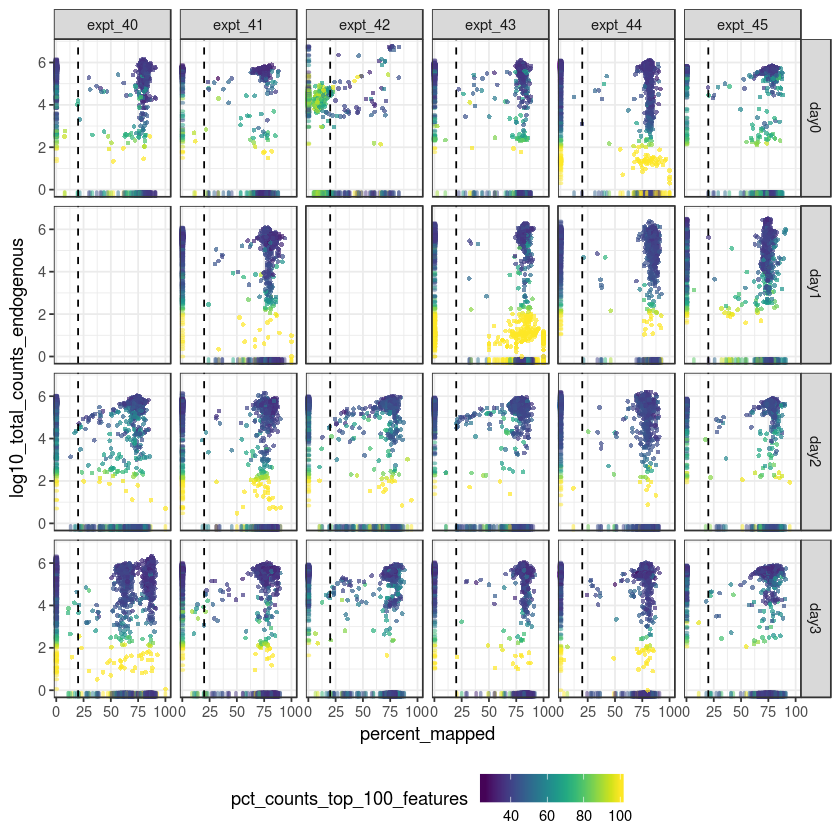

In [28]:
plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts_endogenous,
                  colour = pct_counts_top_100_features)) +
    theme(legend.position = "bottom") +
    geom_vline(xintercept = 20, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw() + theme(legend.position = "bottom")


## Expressed genes vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



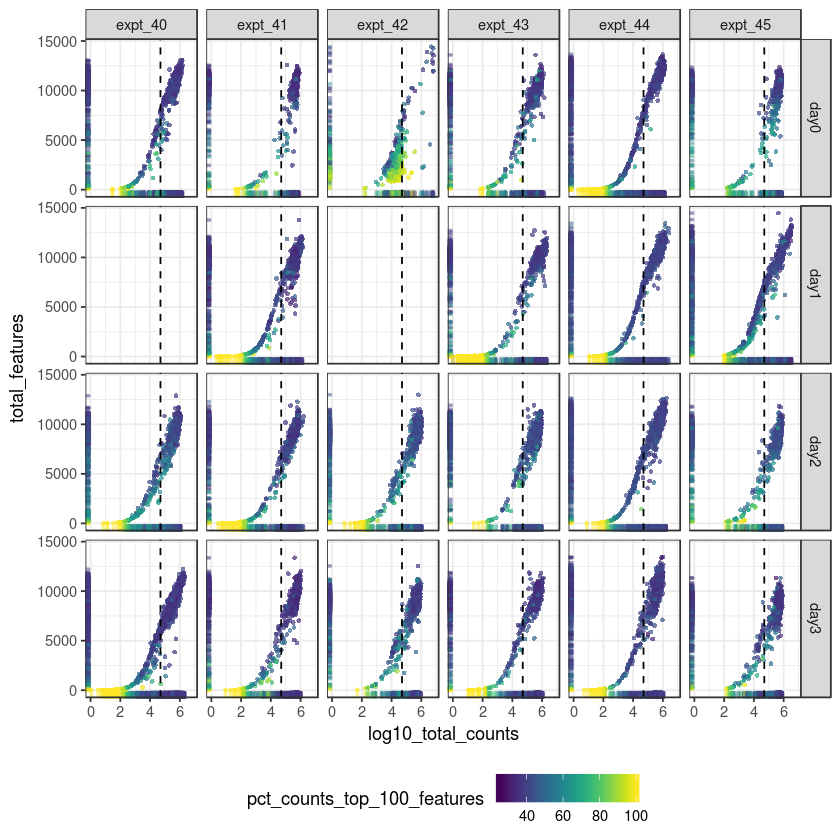

In [30]:
plotPhenoData(sce, aes(x = log10_total_counts, y = total_features,
                  colour =  pct_counts_top_100_features)) +
    facet_grid(day ~ experiment) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() +
    theme(legend.position = "bottom")


## Expressed genes vs endogenous counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



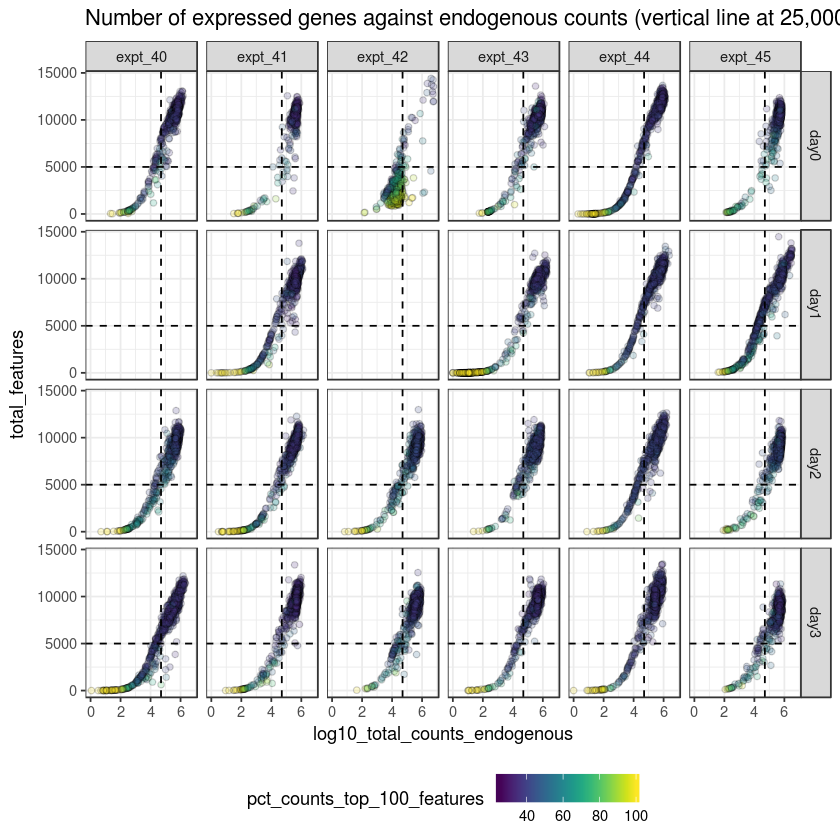

In [31]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
                  fill =  pct_counts_top_100_features)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_viridis() +
    facet_grid(day ~ experiment) +
    ggtitle("Number of expressed genes against endogenous counts (vertical line at 25,000 endogenous counts)") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")


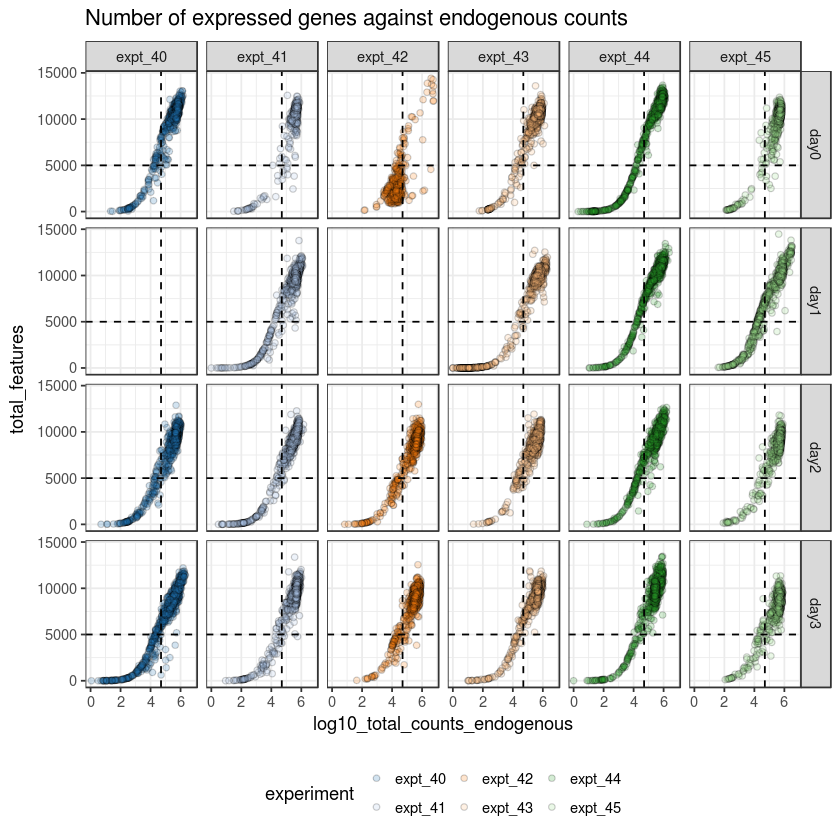

In [32]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  experiment)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_tableau(palette = "tableau20") +
    facet_grid(day ~ experiment) + ggtitle("Number of expressed genes against endogenous counts") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")



## Cumulative Expression Plots

The cumulative expression plot (with cells coloured by total number of
genes from endogenous genes) shows a handful of low complexity
libraries and otherwise a range of library complexities associated
with the percentage of expression accounted for by feature controls.



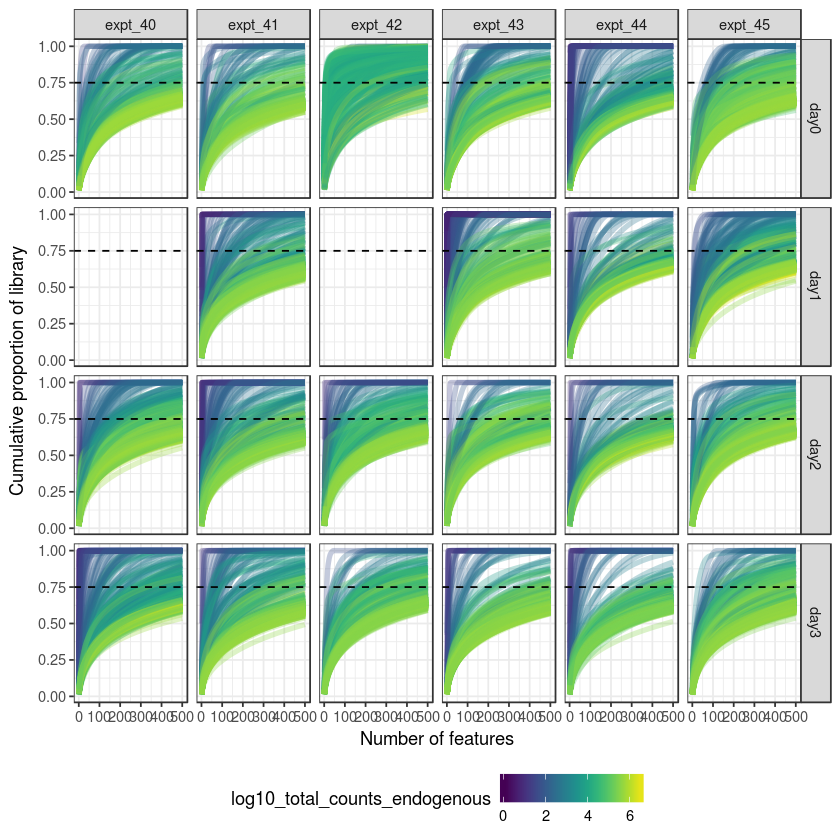

In [33]:
plotScater(sce, exprs_values = "counts", block1 = "experiment", block2 = "day",
           colour_by = "log10_total_counts_endogenous") +
    geom_hline(yintercept = 0.75, linetype = 2) +
    theme_bw() + theme(legend.position = "bottom")


## Most expressed genes

Plot the most expressed genes across each dataset. We have already filtered out ERCC spike-in genes, which have very high expression in the 12 plates from Expt 19, Expt 21 and Expt 22. Many MT and ribosomal genes appear, along with *ACTB* and *GAPDH*, as expected.



Warning message:
“Removed 50 rows containing missing values (geom_point).”

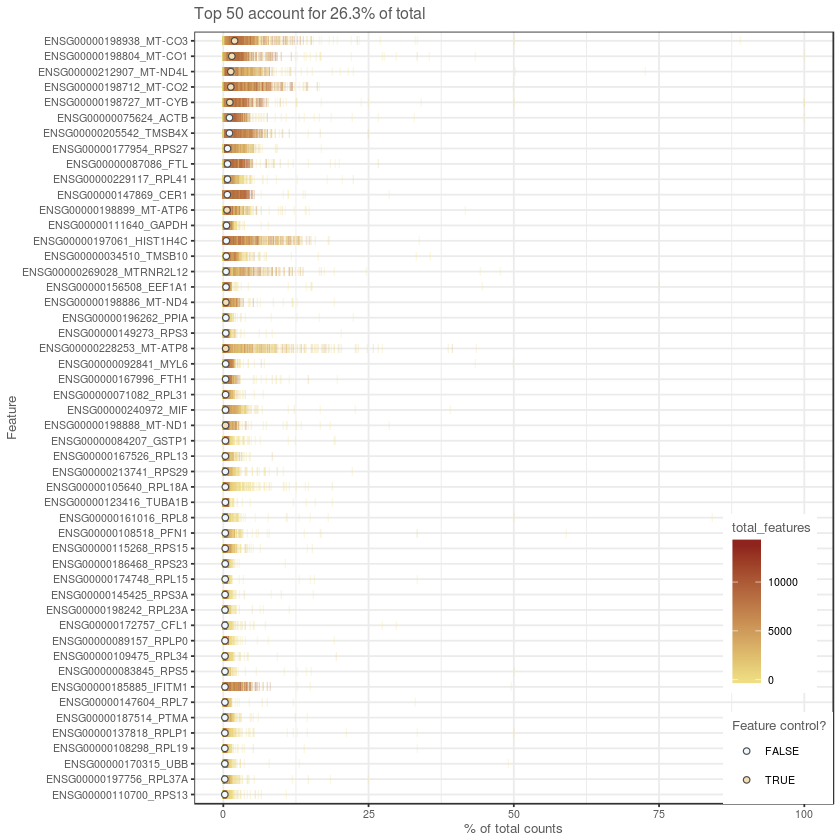

In [34]:
plotQC(sce)


## PCA on QC metrics with outlier detection

Another option available in `scater` is to conduct PCA on a set of QC metrics.
The advantage of doing this is that the QC metrics focus on technical aspects of
the libraries that are likely to distinguish problematics cells. Automatic
outlier detection on PCA plots using QC metrics is available to help identify
potentially problematic cells.

We use the following metrics for PCA-based outlier detection:

* `pct_counts_top_100_features`
* `total_features`
* `pct_counts_feature_controls_MT`
* `pct_counts_feature_controls_ERCC`
* `n_detected_feature_controls`
* `log10_counts_endogenous_features`
* `log10_counts_feature_controls`

A particular set of variables to be used can be specified with the
`selected_variables` argument as shown in the example below.



In [154]:
names(colData(sce))

[1] "salmon_version"                             
  [2] "samp_type"                                  
  [3] "num_libraries"                              
  [4] "library_types"                              
  [5] "frag_dist_length"                           
  [6] "seq_bias_correct"                           
  [7] "gc_bias_correct"                            
  [8] "num_bias_bins"                              
  [9] "mapping_type"                               
 [10] "num_targets"                                
 [11] "num_bootstraps"                             
 [12] "num_processed"                              
 [13] "num_mapped"                                 
 [14] "percent_mapped"                             
 [15] "start_time"                                 
 [16] "read_files"                                 
 [17] "expected_format"                            
 [18] "compatible_fragment_ratio"                  
 [19] "num_compatible_fragments"                   
 [20] "num_assigned_fragments"                     
 [21] "num_consistent_mappings"                    
 [22] "num_inconsistent_mappings"                  
 [23] "strand_mapping_bias"                        
 [24] "index"                                      
 [25] "libType"                                    
 [26] "mates1"                                     
 [27] "mates2"                                     
 [28] "output"                                     
 [29] "auxDir"                                     
 [30] "lane"                                       
 [31] "public_name"                                
 [32] "plate_well_id"                              
 [33] "plate_id"                                   
 [34] "well_id"                                    
 [35] "experiment"                                 
 [36] "day"                                        
 [37] "well_id.1"                                  
 [38] "x"                                          
 [39] "y"                                          
 [40] "population"                                 
 [41] "well_type"                                  
 [42] "plate_position_y"                           
 [43] "plate_position_x"                           
 [44] "adj_x"                                      
 [45] "adj_y"                                      
 [46] "n_events_sorted"                            
 [47] "n_events_total"                             
 [48] "mean_cxcr4_sorted"                          
 [49] "mean_cxcr4_all"                             
 [50] "mean_tra160_sorted"                         
 [51] "mean_tra160_all"                            
 [52] "mean_cxcr4_norm_sorted"                     
 [53] "mean_cxcr4_norm_all"                        
 [54] "mean_tra160_norm_sorted"                    
 [55] "mean_tra160_norm_all"                       
 [56] "median_cxcr4_sorted"                        
 [57] "median_cxcr4_all"                           
 [58] "median_tra160_sorted"                       
 [59] "median_tra160_all"                          
 [60] "mean_7aad_sorted"                           
 [61] "mean_7aad_all"                              
 [62] "median_7aad_sorted"                         
 [63] "median_7aad_all"                            
 [64] "var_cxcr4_sorted"                           
 [65] "var_cxcr4_all"                              
 [66] "var_tra160_sorted"                          
 [67] "var_tra160_all"                             
 [68] "median_hoechst_sorted"                      
 [69] "median_hoechst_all"                         
 [70] "cell_cycle"                                 
 [71] "diff_population"                            
 [72] "cell_name"                                  
 [73] "donor"                                      
 [74] "n_alt_reads"                                
 [75] "n_total_reads"                              
 [76] "nvars_called"                               
 [77] "nvars_ovlap_hipsci"                        


In this case, the automatic outlier detection does not successfully identify as outliers those cells that we would want to filter out, so we will not use these outliers in the QC filtering steps below.



The following selected_variables were not found in colData(object): pct_counts_feature_controlsThe following selected_variables were not found in colData(object): total_features_feature_controlsThe following selected_variables were not found in colData(object): log10_total_counts_feature_controls
Other variables from colData(object) can be used by specifying a vector of variable names as the selected_variables argument.
PCA is being conducted using the following variables:pct_counts_top_100_featurestotal_featureslog10_total_counts_endogenous


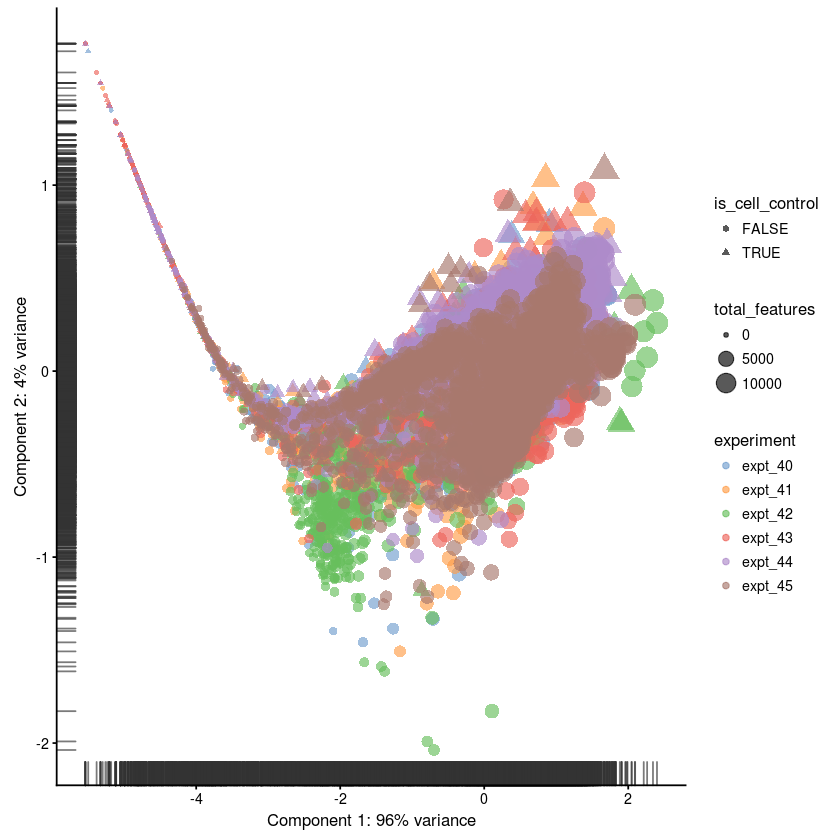

In [40]:
plotPCA(sce, size_by = "total_features", colour_by = "experiment",
        pca_data_input = "pdata", detect_outliers = FALSE)


The cells identified as outliers by the automatic outlier detection method here look like a subset of those that we would like to filter out on the basis of using multiple QC metrics simultaneously.

# Filter cells

Now we will proceed to filtering out potentially problematic cells. We apply the following criteria for filtering:

STRICT:
* total counts from endogenous features > 50,000
* total features > 5000 (and we also allow filter cells more than one MAD from the median for `total_features` in case that capture more cells)
* % counts from top 100 most expressed features < 90%
* % counts from MT genes < 15%
* mapping rate > 60%


We would usually also use the following criteria, but these are distorted by the enormous proportions of ERCC counts for Expt 19, Expt 21 and Expt 22:
* % counts from ERCC < 10%

We do not filter out cells identified as outlers by the automatic outlier detection method above, but do remove the mixed bulk, bulk and control wells from consideration too.

We also filter out cells for which the donor cell line remains "unknown".



In [180]:
sce

class: SingleCellExperiment 
dim: 21172 15753 
metadata(0):
assays(2): tpm counts
rownames(21172): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ENSG00000273439_ZNF8 ENSG00000273484_OR6R2P
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(15753): 24842_5#10 24842_5#100 ... 25698_8#98 25698_8#99
colData names(123): salmon_version samp_type ... control_type
  cell_filter
reducedDimNames(0):
spikeNames(0):

In [156]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]

In [157]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_40  732    0  728  766
  expt_41  384  767  768  768
  expt_42  384    0  683  763
  expt_43  708  756  768  767
  expt_44  767  767  768  768
  expt_45  752  719  721  749

In [158]:
head(sce$percent_mapped)

[1] 60.85343 72.54590 71.79729 78.45088 67.08004 72.94759

In [8]:
cell_filter_strict <- (sce$total_counts_endogenous > 50000 &
                           sce$total_features > 5000 &
#                             sce$pct_counts_feature_controls_ERCC < 10,
                           sce$pct_counts_MT < 15 &
                           sce$pct_counts_top_100_features < 90 &
                           sce$percent_mapped > 60 &
#                            !outlier,
                           sce$donor != "unknown" &
                           sce$donor != "mixed_bulk" &
                           sce$well_type != "bulk" &
                           sce$well_type != "control" &
                           sce$well_type != "empty" &
                           !isOutlier(sce$total_features, 1, type = "lower"))


Drop plates that do not have at least 50 QC-passing cells.



In [9]:
sce_filt = sce[,cell_filter_strict]
ncol(sce_filt[,sce_filt$donor != "unknown"])
ncol(sce_filt)

[1] 11574

[1] 11584

In [160]:
qc_pass_per_plate <- table(sce$plate_id[sce$cell_filter])
drop_plate <- names(qc_pass_per_plate)[qc_pass_per_plate < 50]
cell_filter_strict[sce$plate_id %in% drop_plate] <- FALSE
sce$cell_filter <- cell_filter_strict


`r sum(cell_filter_strict)` cells pass this relatively strict QC
procedure. That means that `r round(mean(cell_filter_strict) * 100)`
of cells overall pass QC.



In [161]:
sum(cell_filter_strict)
mean(cell_filter_strict) * 100

[1] 11395

[1] 72.33543


The table below shows the number of QC-passing cells per experiment and day.



In [162]:
knitr::kable(table(sce$experiment[sce$cell_filter], sce$day[sce$cell_filter]))



|        | day0| day1| day2| day3|
|:-------|----:|----:|----:|----:|
|expt_40 |  607|    0|  501|  395|
|expt_41 |  319|  562|  562|  627|
|expt_42 |    6|    0|  487|  606|
|expt_43 |  576|  469|  600|  636|
|expt_44 |  556|  608|  546|  614|
|expt_45 |  631|  389|  571|  527|

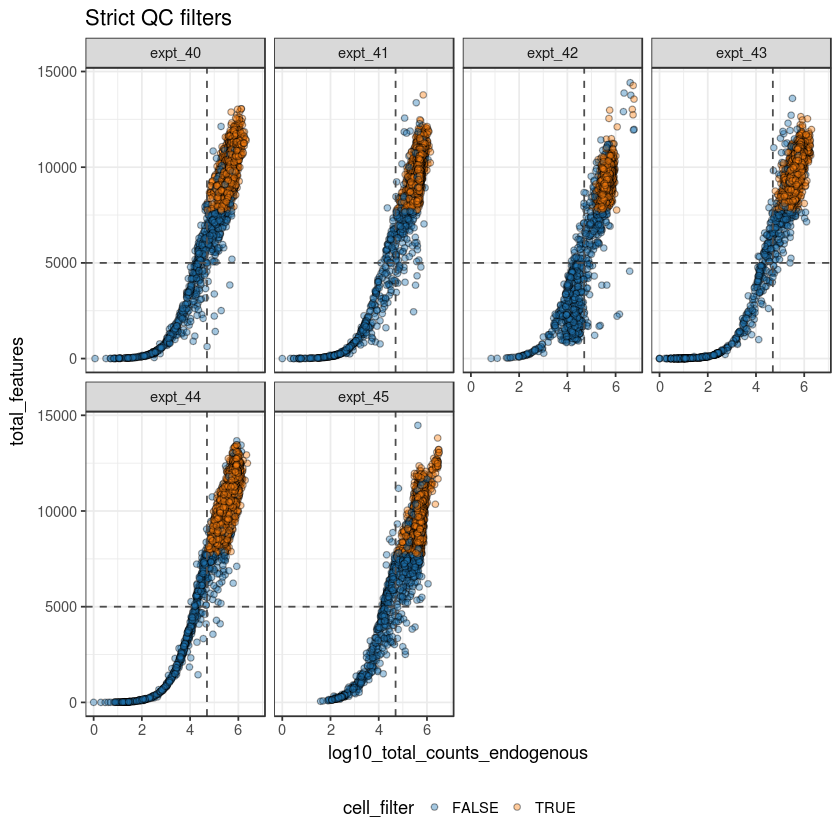

In [60]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
     geom_point(shape = 21, alpha= 0.4) +
     scale_fill_tableau() +
     facet_wrap(~experiment, ncol = 4) + ggtitle("Strict QC filters") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = log10(50000), linetype = 2, colour = "gray30") +
     theme_bw() + theme(legend.position = "bottom")


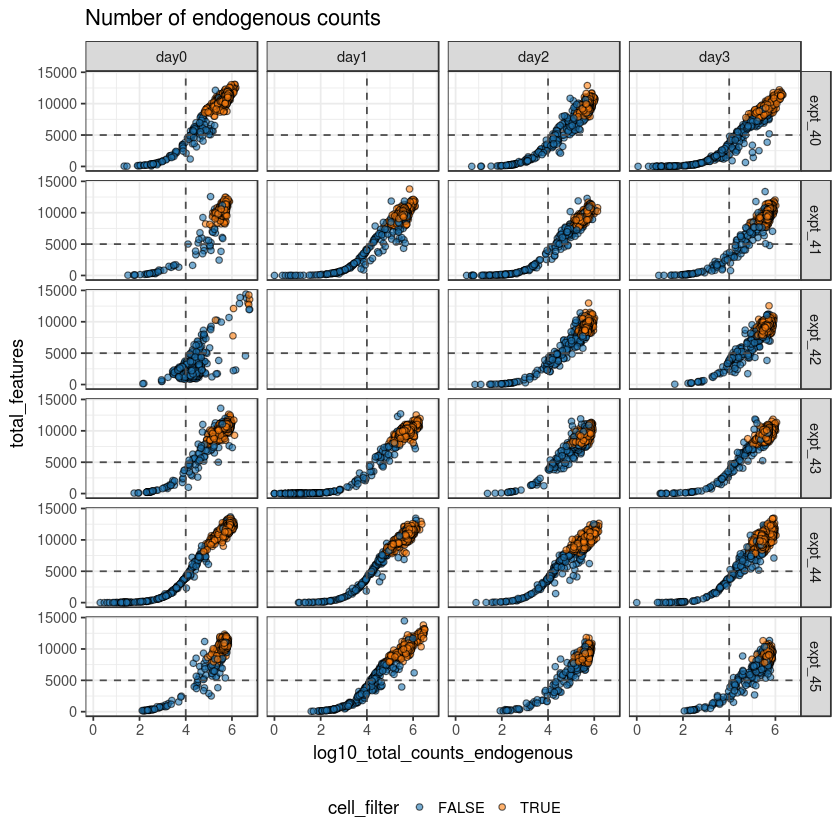

In [61]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
    geom_point(shape = 21, alpha= 0.6) +
    scale_fill_tableau() +
    facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = 4, linetype = 2, colour = "gray30") +
    theme_bw() + theme(legend.position = "bottom")


In [163]:
sce_filt <- sce[, sce$cell_filter]
dim(sce_filt)

[1] 21172 11395

In [55]:
#mem_used()

In [56]:
#object_size(sce_filt)


After this filtering we retain **10,639** cells for downstream analysis.




In [164]:
fall <- as.data.frame(table(sce$day, sce$experiment))$Freq
ffilt <- as.data.frame(table(sce_filt$day, sce_filt$experiment))$Freq
matrix(100 * ffilt / fall, nrow = length(unique(sce_filt$day)),
       dimnames = list(sort(unique(sce_filt$day)), sort(unique(sce_filt$experiment)))) %>%  kable



|     |  expt_40|  expt_41|  expt_42|  expt_43|  expt_44|  expt_45|
|:----|--------:|--------:|--------:|--------:|--------:|--------:|
|day0 | 82.92350| 83.07292|  1.56250| 81.35593| 72.49022| 83.90957|
|day1 |      NaN| 73.27249|      NaN| 62.03704| 79.26988| 54.10292|
|day2 | 68.81868| 73.17708| 71.30307| 78.12500| 71.09375| 79.19556|
|day3 | 51.56658| 81.64062| 79.42333| 82.92047| 79.94792| 70.36048|


Table showing number of cells with "unknown" donor:



In [165]:
table(sce$donor == "unknown", sce$experiment) %>% kable



|      | expt_40| expt_41| expt_42| expt_43| expt_44| expt_45|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |    1924|    2391|    1376|    2609|    2695|    2720|
|TRUE  |     302|     296|     454|     390|     375|     221|


Table showing number of cells with more than 50,000 endogenous counts,
by experiment:



In [166]:
table(sce$total_counts_endogenous > 50000, sce$experiment) %>% kable



|      | expt_40| expt_41| expt_42| expt_43| expt_44| expt_45|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |     446|     368|     510|     482|     553|     467|
|TRUE  |    1780|    2319|    1320|    2517|    2517|    2474|




Overall QC pass rate for cells:



In [167]:
100 * ncol(sce_filt) / ncol(sce)

[1] 72.33543


We are able to retain a little over 11000 cells for downstream analysis.

# Check donors

## After QC



In [168]:
tb <- table(sce_filt$donor, sce_filt$day)


There are `r length(unique(sce$donor[sce$cell_filter]))` donors that
have at least one QC-passing cell.

`r sum(table(sce$donor[sce$cell_filter]) >= 15)` donors have at least
15 QC-passing cells aggregated across all days.

`r nrow(tb[rowSums(tb) < 100,])` donors with at least 100 QC-passing
cells aggregated across all days.

All donors used:



In [169]:
length(unique(sce$donor[sce$cell_filter]))
sum(table(sce$donor[sce$cell_filter]) >= 15)
#unique(sce_filt$donor)

[1] 35

[1] 35

In [170]:
rownames(tb)[tb[, "day0"] >= 15]
rownames(tb)[tb[, "day1"] >= 15]
rownames(tb)[tb[, "day2"] >= 15]
rownames(tb)[tb[, "day3"] >= 15]

[1] "aoxv" "ciwj" "eesb" "eipl" "hajc" "hayt" "hecn" "hoik" "jejf" "juuy"
[11] "kefb" "kuco" "kuxp" "liqa" "melw" "nosn" "pahc" "pelm" "pipw" "qehq"
[21] "qunz" "tert" "toco" "tout" "uilk" "xojn" "yelp" "yoch" "zapk"

[1] "aoxv" "ciwj" "eesb" "eipl" "hajc" "hayt" "hecn" "hoik" "jejf" "juuy"
[11] "kuco" "kuxp" "liqa" "melw" "pahc" "pipw" "qehq" "qunz" "tert" "toco"
[21] "uilk" "xojn" "yelp" "yoch"

[1] "aoxv" "bima" "ciwj" "eesb" "eipl" "fiaj" "giju" "hajc" "hayt" "hecn"
[11] "hoik" "jejf" "juuy" "kefb" "kuco" "kuxp" "liqa" "melw" "nosn" "pahc"
[21] "pelm" "pipw" "qehq" "qihv" "qunz" "tert" "toco" "tout" "uilk" "vuna"
[31] "xojn" "yelp" "yoch" "zapk"

[1] "aoxv" "bima" "ciwj" "eesb" "eipl" "fiaj" "giju" "hajc" "hayt" "hecn"
[11] "hoik" "jejf" "juuy" "kuco" "kuxp" "liqa" "melw" "nosn" "pahc" "pelm"
[21] "pipw" "qehq" "qihv" "qunz" "tert" "toco" "tout" "uilk" "vuna" "xojn"
[31] "yelp" "yoch" "zapk"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


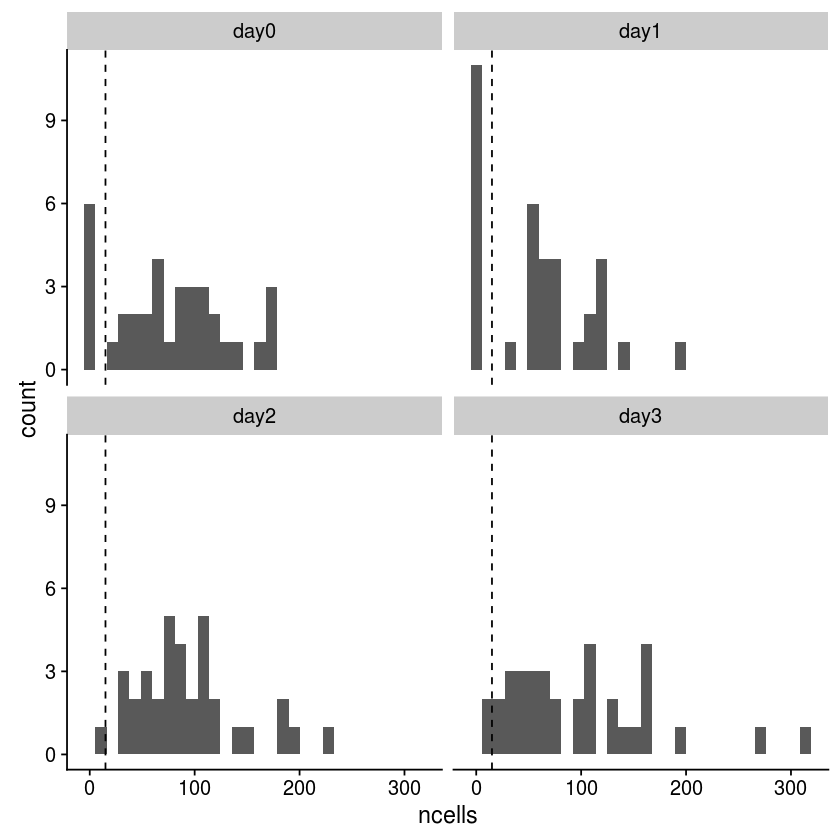

In [171]:
df_ncells <- as_data_frame(table(sce_filt$donor, sce_filt$day))
colnames(df_ncells) <- c("donor", "day", "ncells")
ggplot(df_ncells, aes(x = ncells)) +
    geom_histogram() +
    facet_wrap(~day) +
    geom_vline(xintercept = 15, linetype = 2)


There are `r colSums(tb >= 15)[1]` donors with at least 15 QC-passing day 0 cells.

There are `r colSums(tb >= 15)[2]` donors with at least 15 QC-passing Day 1 cells.

There are `r colSums(tb >= 15)[3]` donors with at least 15 QC-passing Day 2 cells.

There are `r colSums(tb >= 15)[4]` donors with at least 15 QC-passing Day 3 cells .

### Number of cells from each experiment and day that pass the QC



In [172]:
table(sce_filt$donor[sce_filt$experiment == "expt_40"], sce_filt$day[sce_filt$experiment == "expt_40"])

table(sce_filt$donor[sce_filt$experiment == "expt_41"], sce_filt$day[sce_filt$experiment == "expt_41"])

table(sce_filt$donor[sce_filt$experiment == "expt_42"], sce_filt$day[sce_filt$experiment == "expt_42"])

table(sce_filt$donor[sce_filt$experiment == "expt_43"], sce_filt$day[sce_filt$experiment == "expt_43"])

table(sce_filt$donor[sce_filt$experiment == "expt_44"], sce_filt$day[sce_filt$experiment == "expt_44"])

table(sce_filt$donor[sce_filt$experiment == "expt_45"], sce_filt$day[sce_filt$experiment == "expt_45"])

      
       day0 day2 day3
  kefb   67   36   14
  nosn   75   71   53
  pelm  176  179  158
  tout  120   64   42
  zapk  169  151  128

      
       day0 day1 day2 day3
  eipl  100  190  198   57
  hayt   41   65  107  162
  hoik   32   99   71   94
  pahc   61   74   57  109
  xojn   27   55   84  167
  yoch   58   79   45   38

      
       day0 day2 day3
  bima    0   44   31
  fiaj    1   75   37
  giju    3  223  314
  qihv    2   53   66
  vuna    0   78  146
  zihe    0   14   12

      
       day0 day1 day2 day3
  aoxv   68   58   96   71
  eesb   66  106  103  196
  kuxp   84   65   87   63
  melw  101   57   79   80
  qunz   82   61   89   61
  yelp  175  122  146  165

      
       day0 day1 day2 day3
  jejf  107  106  101   50
  juuy  137  116  119  275
  pipw  112  120  105  103
  qehq  115  143  119  134
  toco   29   50   36   30
  uilk   56   73   66   22

      
       day0 day1 day2 day3
  ciwj   40   29   35   39
  hajc  130   51   54   25
  hecn  163  117  181  152
  kuco   95   61  104  106
  liqa  111   72   92  105
  tert   92   59  105  100


Happily, all of the lines that we have sequenced (including monogenic diabetes lines) have genotype data available for our use.



In [173]:
cram2donor <- data.frame(cram_id = sce$sample_id, line_id = sce$donor)
## head(cram2donor)
write_tsv(cram2donor, path = "../../data_processed/merged/20180227/40to45_cram2donor.tsv")


All expression values were quantified using Salmon v0.8.2.

# Filter lowly-expressed genes

We keep genes with at least one count on average across all cells. We also drop feature control genes (ERCCs and MT genes).



In [174]:
saveRDS(sce, "../../data_processed/merged/20180227/sce_merged_40to45_full_with_qc_labels.rds")


In [175]:
# cpm(sce_filt) <- scater::calculateCPM(sce_filt)
keep_gene <- (rowMeans(counts(sce_filt)) > 1)
keep_gene <- ((keep_gene | rownames(sce_filt) %in% diff_genes))
table(keep_gene)
sce_filt <- sce_filt[keep_gene,]
sce_filt
object_size(sce_filt)

keep_gene
FALSE  TRUE 
 9571 11601 

class: SingleCellExperiment 
dim: 11601 11395 
metadata(0):
assays(2): tpm counts
rownames(11601): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(11395): 24842_5#101 24842_5#102 ... 25698_8#98 25698_8#99
colData names(123): salmon_version samp_type ... control_type
  cell_filter
reducedDimNames(0):
spikeNames(0):

2.14 GB


This filtering reduces the number of genes from ~20,000 to just ~10,000.

Now compute logcounts values for the object and save.



In [176]:
logcounts(sce_filt) <- log2(
    calculateCPM(sce_filt, use.size.factors = FALSE) + 1)
# saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_40to45_filt.rds")


# Normalization with *scran* size factors

We can compute the "sum factors" with *scran* and look at their distributions across experiments and days, especially in relation to the number of counts from endogenous features.



In [177]:
source("https://bioconductor.org/biocLite.R")
biocLite("scran")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) ‘scran’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'ape', 'bindrcpp', 'bit', 'broom', 'callr', 'caret', 'cluster',
  'CVST', 'data.table', 'DBI', 'ddalpha', 'devtools', 'dplyr', 'dtw',
  'foreign', 'Formula', 'fpc', 'futile.options', 'GGally', 'ggjoy', 'ggridges',
  'ggthemes', 'git2r', 'glmnet', 'htmlTable', 'htmlwidgets', 'httpuv', 'ica',
  'IRdisplay', 'irlba', 'kernlab', 'lambda.r', 'lubridate', 'maps', 'MASS',
  'Matrix', 'modelr', 'mvtnorm', 'nlme', 'NMF', 'pbapply', 'pbdZMQ', 'pillar',
  'pkgmaker', 'prodlim', 'proxy', 'pryr', 'psych', 'purrr', 'quantmod', 'R.oo',
  'ranger', 'Rcpp', 'RcppArmadillo', 'RcppEigen'

In [178]:
library(scran)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


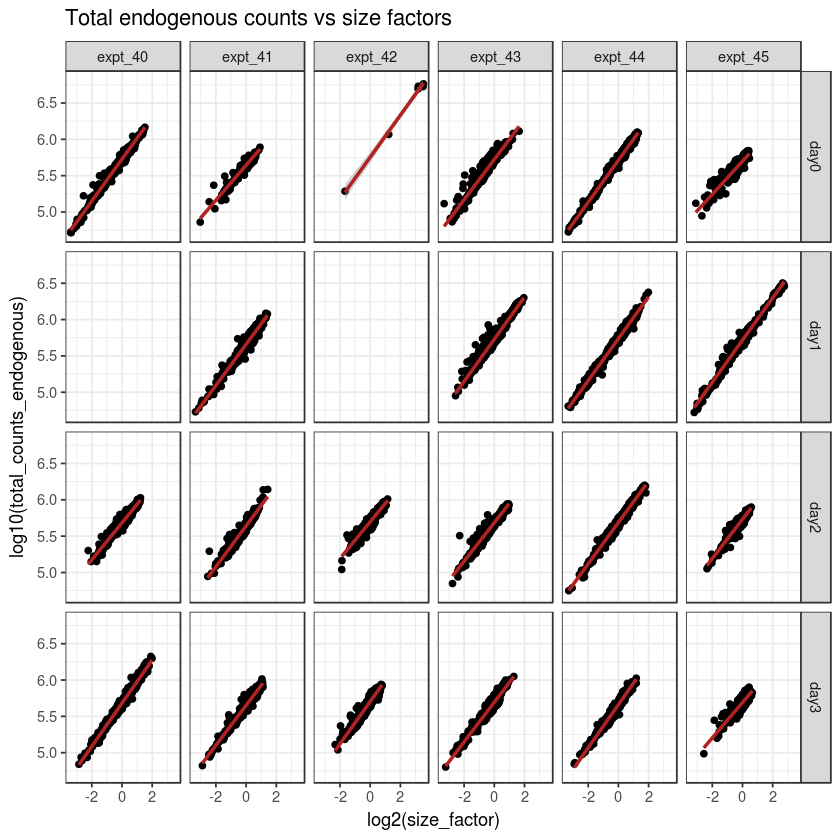

Picking joint bandwidth of 0.179


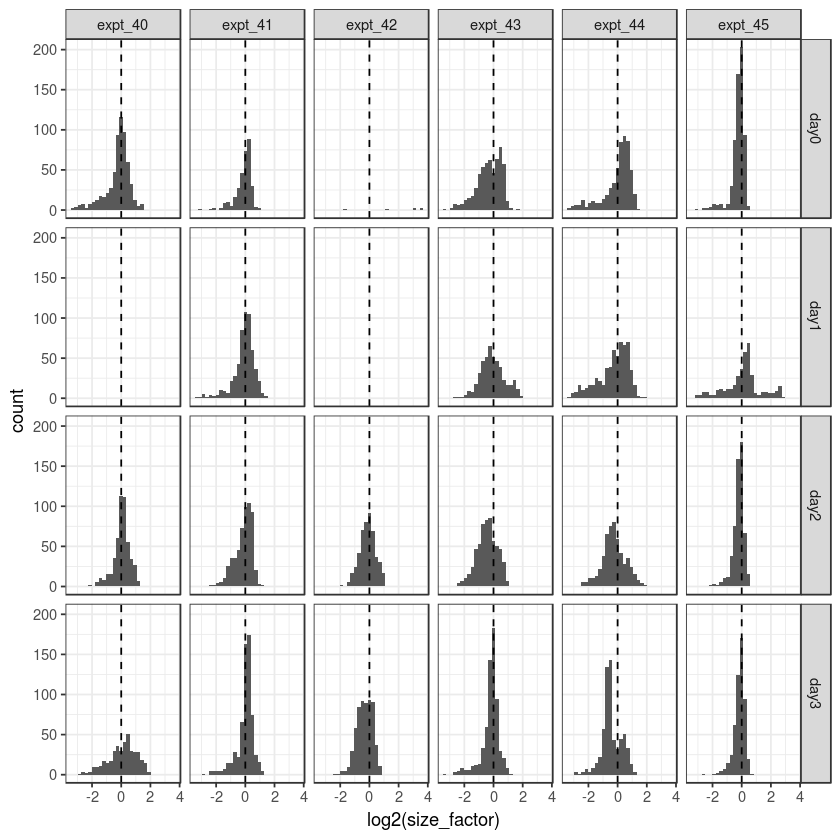

         
          FALSE
  expt_40  1503
  expt_41  2070
  expt_42  1099
  expt_43  2281
  expt_44  2324
  expt_45  2118

         
          FALSE
  expt_40  1503
  expt_41  2070
  expt_42  1099
  expt_43  2281
  expt_44  2324
  expt_45  2118

[1] 0

[1] 0

[1] 38

[1] 0.003334796

[1] 125

[1] 0.01096972

[1] 348

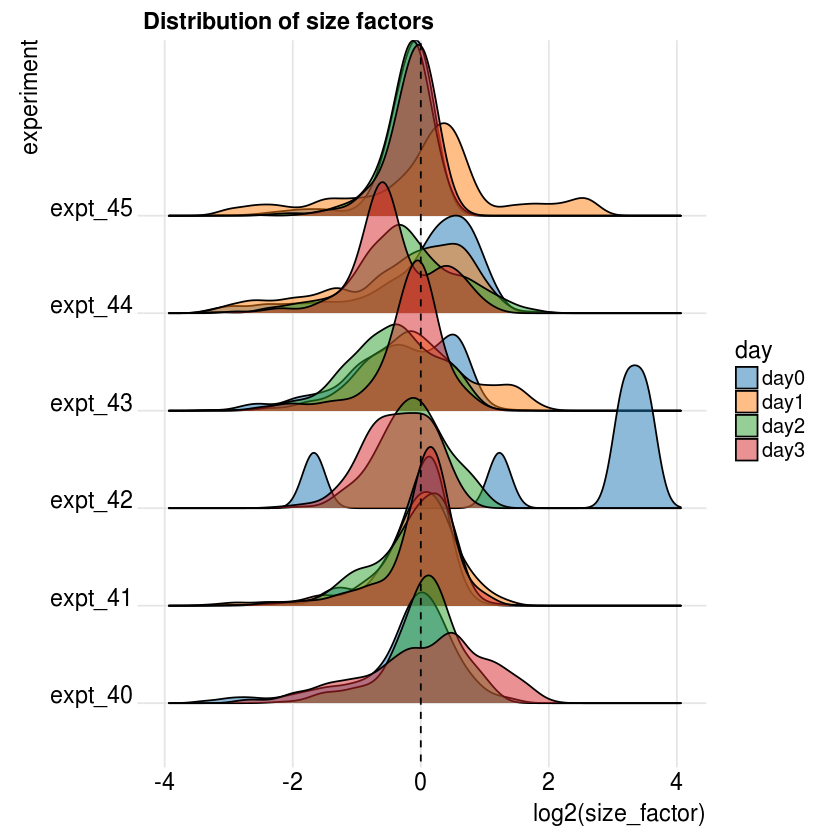

In [179]:
#sce_filt <- readRDS(file = "../../data_processed/merged/sce_merged_qc_filt.rds")
isSpike(sce_filt, "ERCC") <- grepl("^ERCC-", rownames(sce_filt))
clusters <- scran::quickCluster(sce_filt, min.size = 400, method = "igraph",
                         subset.row = sample(nrow(sce_filt), size = 3000))
sce_filt <- computeSumFactors(sce_filt, cluster = clusters)
#sce_filt <- computeSpikeFactors(sce_filt, general.use = FALSE)

sce_filt$size_factor <- sizeFactors(sce_filt)

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = log10(total_counts_endogenous))) +
    geom_point() + geom_smooth(method = "lm", colour = "firebrick") +
    facet_grid(day ~ experiment) + theme_bw() +
    ggtitle("Total endogenous counts vs size factors")

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor))) +
    geom_histogram() + geom_vline(xintercept = 0, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw()

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = experiment, fill = day)) +
    geom_density_ridges(alpha = 0.5) + geom_vline(xintercept = 0, linetype = 2) +
    theme_ridges() + ggtitle("Distribution of size factors") +
    scale_fill_tableau()

table(sce_filt$experiment, sizeFactors(sce_filt) < 0.05)

table(sce_filt$experiment, sizeFactors(sce_filt) > 20)

sum(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

mean(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

sum(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
mean(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
sum(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
mean(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
sum(sizeFactors(sce_filt) > 4 | sizeFactors(sce_filt) < 1 / 4)


We will remove another 1.5% of cells with size factors <0.125 or greater than 8.

Very high correlation between size factors and total counts from endogenous features (both on the log scale).



In [181]:
sce_filt <- sce_filt[, (sizeFactors(sce_filt) < 8 & sizeFactors(sce_filt) > 0.125)]

In [182]:
summary(sizeFactors(sce_filt))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1252  0.6950  0.9417  0.9994  1.2013  6.8264 


These look more reasonable now, so we will go with this set of cells and size factors.



In [183]:
dim(sce_filt)

[1] 11601 11357


Now normalize the expression data using these *scran* size factors.



In [184]:
sce_filt <- normalize(sce_filt)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [ ]:
## unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2])
## length(unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2]))

In [185]:
prle <- plotRLE(sce_filt[!rowData(sce_filt)$is_feature_control,],
                list(exprs = "exprs"), exprs_logged = TRUE,
                colour_by = "experiment", style = "minimal")

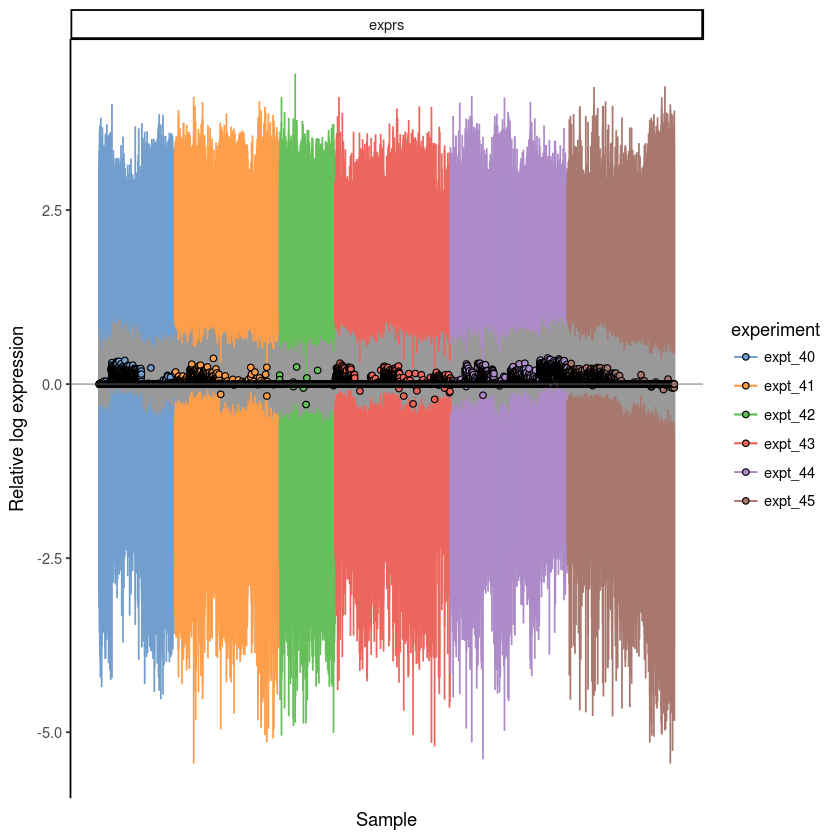

In [186]:
prle

In [ ]:
ggsave(filename = "../../figures/rle_plot_qc_merged_no_outliers_40to45_20180227.png", plot = prle, height = 9, width = 15)


![RLE plot without outliers](../../figures/rle_plot_qc_merged_no_outliers_20180227.png)



In [187]:
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_40to45_filt.rds")


# Identify highly variable genes



`geom_smooth()` using method = 'gam'


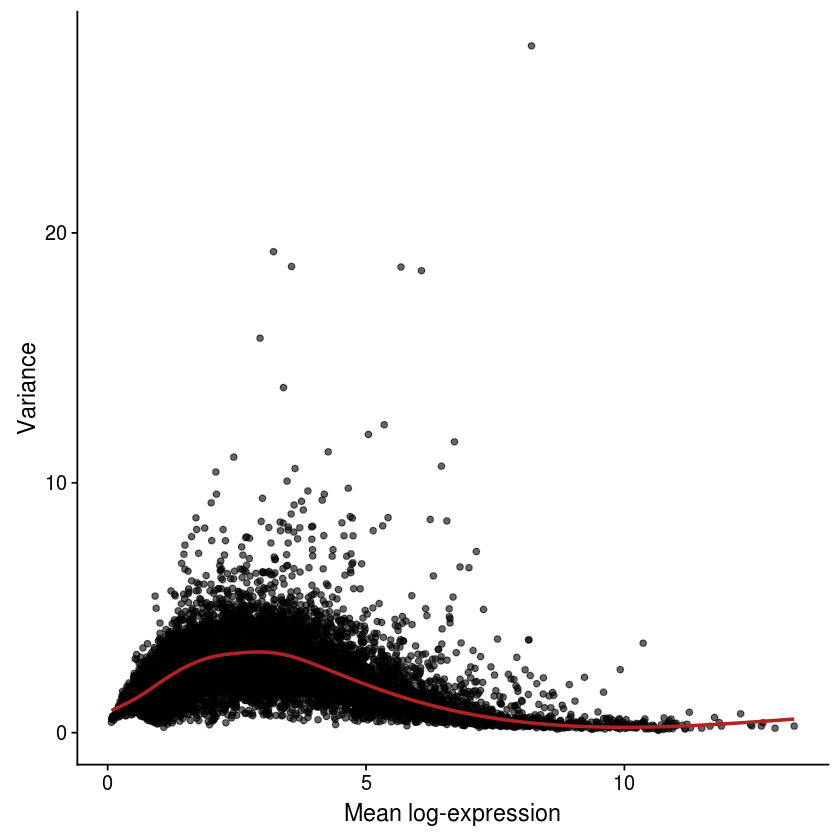

In [188]:
## sce_filt <- readRDS("../../data_processed/merged/sce_merged_qc_filt_20170829.rds")
design <- model.matrix(~experiment, data = colData(sce_filt))
alt.fit <- trendVar(sce_filt, design = design, use.spikes = FALSE)
alt.decomp <- decomposeVar(sce_filt, alt.fit)

data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech) %>%
    ggplot(aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")


In [189]:
top.hvgs <- order(alt.decomp$bio, decreasing = TRUE)
head(alt.decomp[top.hvgs,])
dim(alt.decomp)
sum(alt.decomp$FDR < 0.05, na.rm = TRUE)
sum(alt.decomp$FDR < 0.01, na.rm = TRUE)
sum(alt.decomp$bio >= 0.1 * alt.decomp$tech)
hvgs <- rownames(alt.decomp[alt.decomp$FDR < 0.01,])
length(hvgs)
diff_genes[diff_genes %in% hvgs]

mean     total    bio      tech      p.value FDR
ENSG00000147869_CER1    8.201866 27.48498 27.02277 0.4622122 0       0  
ENSG00000095596_CYP26A1 6.072612 18.48991 17.33541 1.1544974 0       0  
ENSG00000158815_FGF17   5.676431 18.63418 17.23898 1.3951972 0       0  
ENSG00000120937_NPPB    3.209880 19.24882 16.06971 3.1791090 0       0  
ENSG00000104371_DKK4    3.559262 18.65525 15.60618 3.0490676 0       0  
ENSG00000250361_GYPB    2.950049 15.78411 12.56876 3.2153521 0       0

[1] 11601     6

[1] 4547

[1] 4433

[1] 3644

[1] 4433

[1] "ENSG00000111704_NANOG"  "ENSG00000204531_POU5F1" "ENSG00000181449_SOX2"  
 [4] "ENSG00000121570_DPPA4"  "ENSG00000164458_T"      "ENSG00000163508_EOMES" 
 [7] "ENSG00000185155_MIXL1"  "ENSG00000121966_CXCR4"  "ENSG00000136574_GATA4" 
[10] "ENSG00000141448_GATA6"  "ENSG00000164736_SOX17"  "ENSG00000133937_GSC"   
[13] "ENSG00000147869_CER1"   "ENSG00000132130_LHX1"   "ENSG00000152804_HHEX"  
[16] "ENSG00000170608_FOXA3"

`geom_smooth()` using method = 'gam'


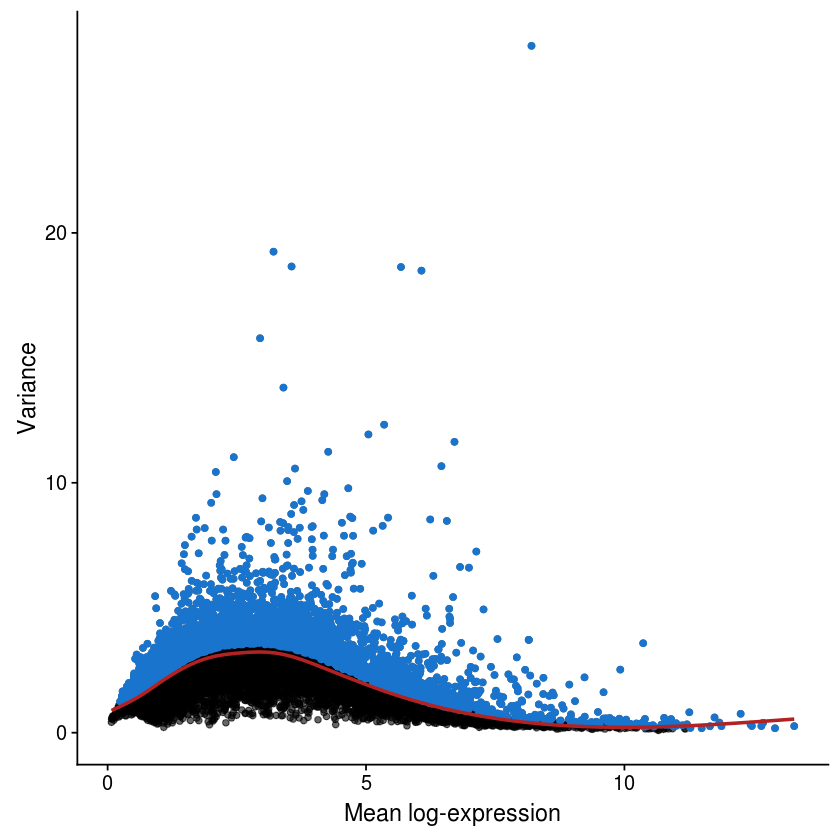

In [190]:
vardecomp <-  data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech, bio = alt.decomp$bio)
ggplot(vardecomp, aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_point(aes(x = mean, y = total), colour = "dodgerblue3",
               data = dplyr::filter(vardecomp, bio >= 0.1 * tech)) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")

In [191]:
null.dist <- correlateNull(design = design) # fewer iterations can to speed it up.
# cor.genes <- correlatePairs(sce_filt[top.hvgs,], null.dist=null.dist, per.gene=TRUE)
# head(cor.genes)
cor.pairs <- correlatePairs(sce_filt[hvgs,], null.dist=null.dist, design=design)
head(cor.pairs)
g1 <- cor.pairs$gene1[cor.pairs$FDR < 0.05]
g2 <- cor.pairs$gene2[cor.pairs$FDR < 0.05]
high_cor_genes <- unique(c(g1, g2))

gene1                    gene2                     rho       p.value     
1 ENSG00000230903_RPL9P8   ENSG00000237550_UBE2Q2P6  0.9999743 1.999998e-06
2 ENSG00000094755_GABRP    ENSG00000164265_SCGB3A2   0.9152185 1.999998e-06
3 ENSG00000255823_MTRNR2L8 ENSG00000269028_MTRNR2L12 0.9115818 1.999998e-06
4 ENSG00000110777_POU2AF1  ENSG00000147869_CER1      0.8694548 1.999998e-06
5 ENSG00000197756_RPL37A   ENSG00000213741_RPS29     0.8607830 1.999998e-06
6 ENSG00000145592_RPL37    ENSG00000197756_RPL37A    0.8546303 1.999998e-06
  FDR          limited
1 5.193246e-06 TRUE   
2 5.193246e-06 TRUE   
3 5.193246e-06 TRUE   
4 5.193246e-06 TRUE   
5 5.193246e-06 TRUE   
6 5.193246e-06 TRUE


Filter down to an object just containing the
`r length(intersect(high_cor_genes, hvgs))` highly-variable genes.



In [192]:
hvgs <- intersect(high_cor_genes, hvgs)
sce_hvg <- sce_filt[rownames(sce_filt) %in% c(hvgs, diff_genes),]

ERROR: Error in eval(expr, envir, enclos): object 'sce' not found


In [193]:
saveRDS(object = sce_hvg, file = "../../data_processed/merged/20180227/sce_merged_qc_40to45_hvg.rds")

rowData(sce_filt)$is_hvg <- rownames(sce_filt) %in% hvgs
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_40to45_filt.rds")

sce_hvg

mem_used()

# saveRDS(exprs(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.exprs.rds")

# saveRDS(counts(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.counts.rds")

# saveRDS(colData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.pdata.rds")

# saveRDS(rowData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.fdata.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day0"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day1"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1.rds")

# saveRDS(sce_hvg[, sce_hvg$day %in% c("day2", "day3")], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2-3.rds")

# saveRDS(sce_filt[rownames(sce_filt) %in% c(high_cor_genes, diff_genes), sce_filt$cell_filter], "../../data_processed/merged/20180227/sce_merged_strict_qc_hvg.rds")

class: SingleCellExperiment 
dim: 4435 11357 
metadata(1): log.exprs.offset
assays(3): tpm counts logcounts
rownames(4435): ENSG00000001617_SEMA3F ENSG00000001626_CFTR ...
  ENSG00000269404_SPIB ENSG00000271043_MTRNR2L2
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(11357): 24842_5#101 24842_5#102 ... 25698_8#98 25698_8#99
colData names(124): salmon_version samp_type ... cell_filter
  size_factor
reducedDimNames(0):
spikeNames(1): ERCC

11.7 GB


Save datasets for QTL analysis (keeping donors with >=15 cells passing QC).



In [ ]:
# tb <- table(sce_hvg$donor, sce_hvg$day)
# donors_day0 <- rownames(tb)[tb[, "day0"] >= 15]
# write_tsv(data_frame(donor = sort(rownames(tb)[tb[, "day0"] >= 15])),
#           path = "../../qtls/day0_donors_20180227.tsv",
#           col_names = FALSE)
# donors_day1 <- rownames(tb)[tb[, "day1"] >= 15]
# donors_day2 <- rownames(tb)[tb[, "day2"] >= 15]
# donors_day3 <- rownames(tb)[tb[, "day3"] >= 15]
# donors_alldays <- rownames(tb)[rowSums(tb) >= 50]

# saveRDS(sce_hvg[, (sce_hvg$day == "day0" & sce_hvg$donor %in% donors_day0)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day1" & sce_hvg$donor %in% donors_day1)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day2" & sce_hvg$donor %in% donors_day2)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day3" & sce_hvg$donor %in% donors_day3)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day3_for_qtl.rds")


# saveRDS(sce_hvg[, (sce_hvg$donor %in% donors_alldays)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_alldays_for_qtl.rds")





# Visualize filtered dataset

We take a look at the normalized, filtered dataset using some common dimension reduction techniques (PCA, diffusion maps, t-SNE).

## RLE plot



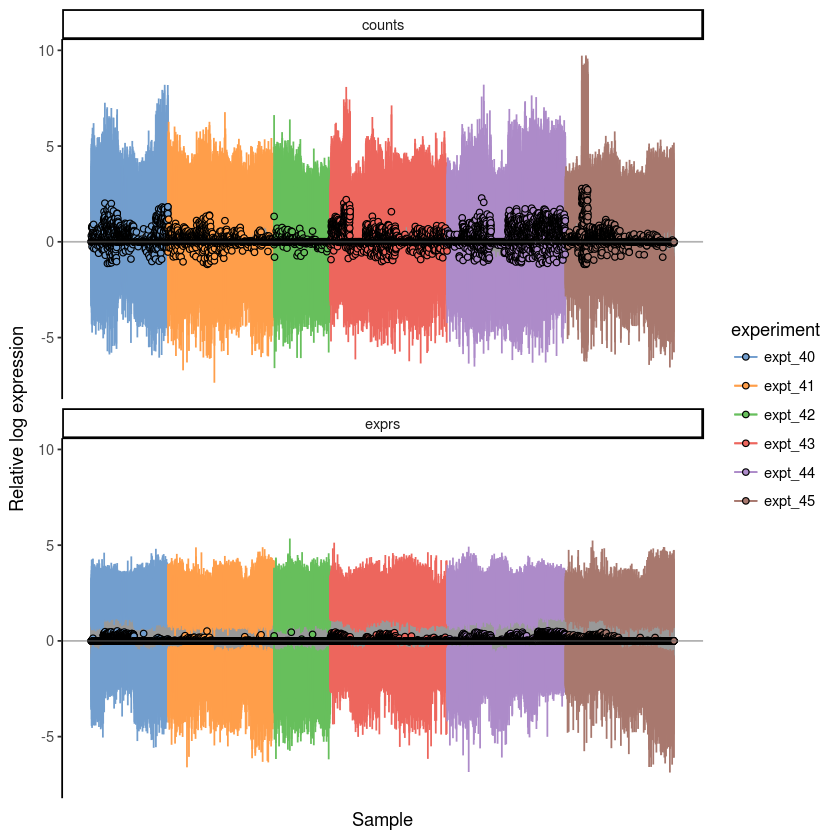

In [194]:
prle <- plotRLE(sce_hvg, list(counts = "counts", exprs = "exprs"),
                exprs_logged = c(FALSE, TRUE),
                colour_by = "experiment", style = "minimal")
prle


## PCA plots

We can show overall structure amongst QC cells with simple PCA plots.



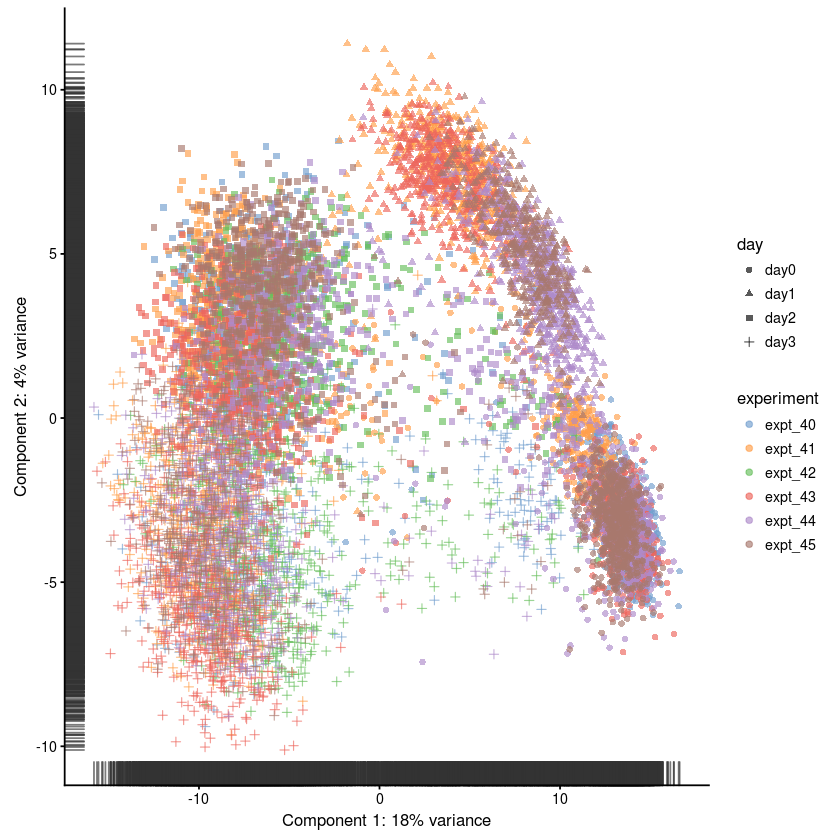

In [195]:
sce_hvg <- plotPCA(sce_hvg, colour_by = "experiment", shape_by = "day",
                   return_SCE = TRUE, ncomponents = 2, draw_plot = TRUE)

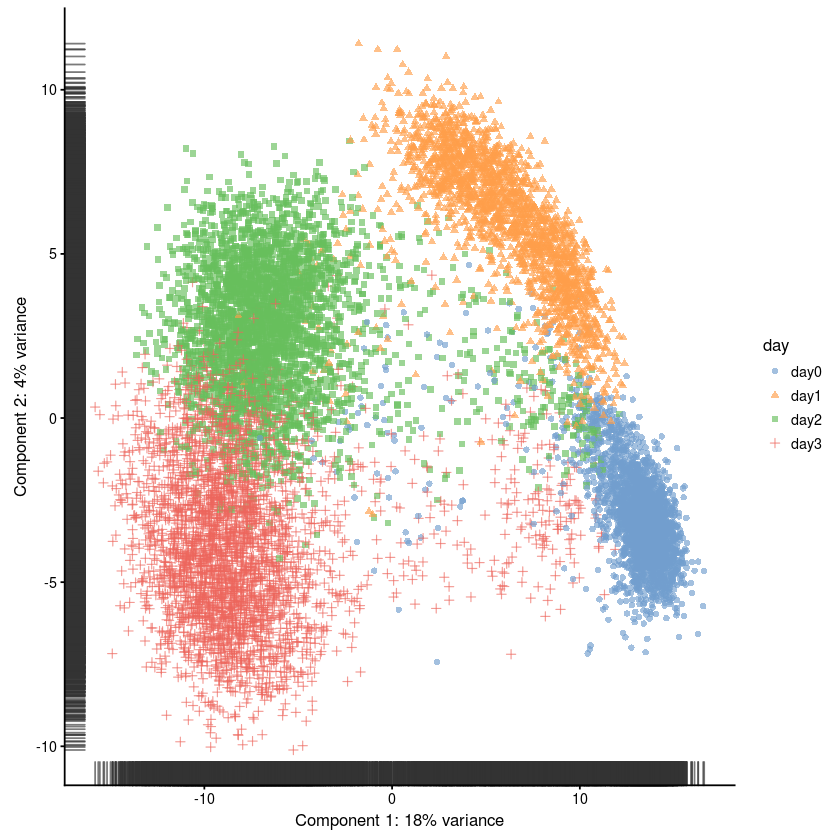

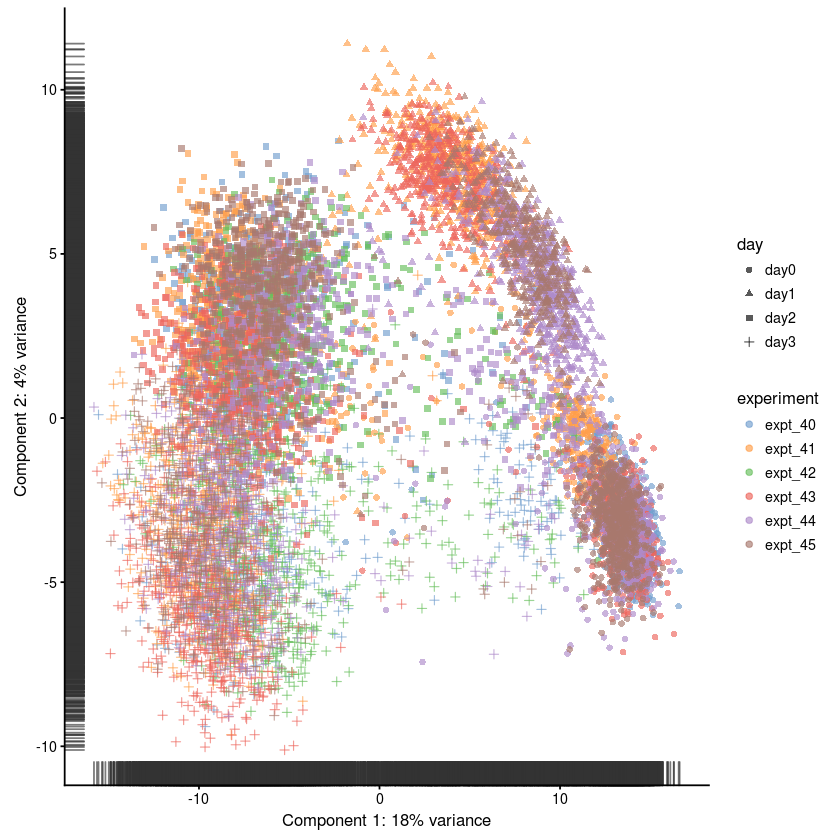

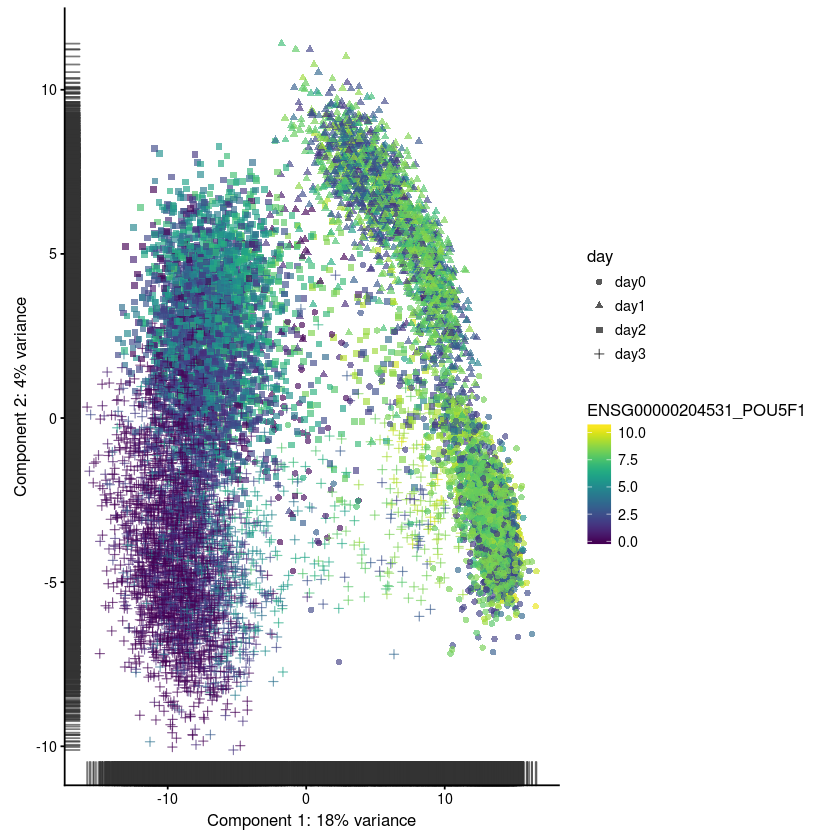

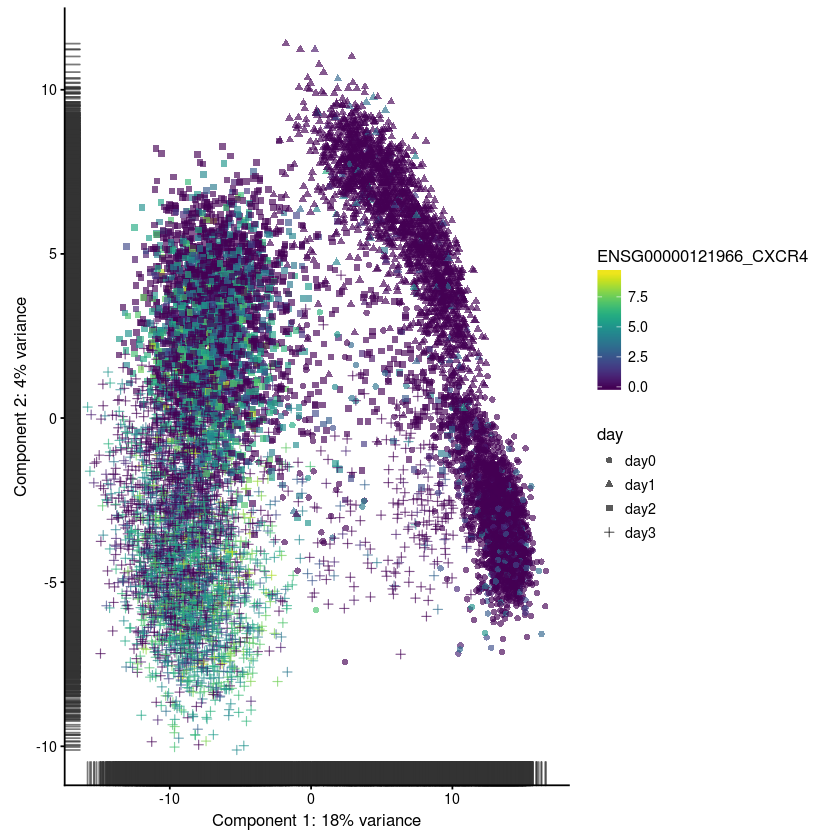

In [196]:

plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "day", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "experiment", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000204531_POU5F1", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000121966_CXCR4", shape_by = "day")






# Session Info



In [ ]:
sessionInfo()